In [3]:
import fall_23.scripts.TraitBasedPersonalityTest as tbpt
import fall_23.scripts.PersonalityTestResponses as ptr
import fall_23.scripts.notebook_commons as nc
from fall_23.scripts.Centroids import Centroids
import fall_23.scripts.personality_tools as pt
import fall_23.scripts.LangchainInterface as LCI
import fall_23.scripts.LangchainLlm as LCL
import fall_23.scripts.SyntheticPopulation as SP

import random
import time
import numpy as np
import pandas as pd

from IPython.display import Image

import holoviews as hv
hv.extension('matplotlib')



<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [4]:
%load_ext rpy2.ipython

C:\Users\38977332\OneDrive - Southern Methodist University\Documents\School\APF\Repos\apf\LLM_Personality\venv\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [5]:
%%R
R.version.string

[1] "R version 4.3.2 (2023-10-31 ucrt)"


In [6]:
import os
os.environ['R_HOME'] = r'C:\Users\38977332\AppData\Local\Programs\R\R-4.3.2'
import rpy2
from rpy2 import robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects import numpy2ri
from rpy2.robjects.packages import data
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

rpy2.robjects.numpy2ri.activate()
utils.install_packages('base')
utils.install_packages('psych')
utils.install_packages('GPArotation')

R[write to console]: Warning:
R[write to console]:  package 'base' is in use and will not be installed

R[write to console]: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.3/psych_2.4.1.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 3488319 bytes (3.3 MB)

R[write to console]: downloaded 3.3 MB




package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\38977332\AppData\Local\Temp\RtmpiMQq6X\downloaded_packages


R[write to console]: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.3/GPArotation_2024.2-1.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 392178 bytes (382 KB)

R[write to console]: downloaded 382 KB




package 'GPArotation' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\38977332\AppData\Local\Temp\RtmpiMQq6X\downloaded_packages


<rpy2.rinterface_lib.sexp.NULLType object at 0x000001D430637090> [0]

# Driving Generative Agents With Their Personality

## Abstract

### Old

This research explores the potential of Large Language Models (LLMs) to utilize psychometric values, specifically personality information, within the context of video game character development. Affective Computing (AC) systems quantify a Non-Player character's (NPC) psyche, and an LLM can take advantage of the system's information by using the values for prompt generation. The research shows an LLM can consistently represent a given personality profile, thereby enhancing the human-like characteristics of game characters. Repurposing a human examination, the International Personality Item Pool (IPIP) questionnaire, to evaluate an LLM shows that the model can accurately generate content concerning the personality provided. Results show that the improvement of LLM, such as the latest GPT-4 model, can consistently utilize and interpret a personality to represent behavior. 

### New

This research focuses on Google's pipeline, which determines the reliability and validity, under psychometric theories, of an LLM "understanding" a personality. By showing multiple pieces of evidence of Construct Validity, which determines the structural validity of an LLM's responses to taking a personality test and checking external validity by testing its responses with other personality tests, the pipeline can test any LLM with any personality test. However, this pipeline solely depends on benchmark results within the psychometric community, stating that the LLM can resemble the personality it was assigned as long as these tests pass the thresholds. To confirm this, we are investigating human responses to a personality test and comparing the results created by the human population against the LLM population. To do this, we will extend Google's pipeline to have additional evidence of criterion validity. 

### Keywords

Large Language Models
chatGPT
psychometrics
procedural content generation

## Introduction

### Old

In the dynamic and rapidly evolving domain of the video game industry, the exigent task of developing Non-Playable Characters (NPCs) that emulate human-like behavior presents a formidable challenge. A significant obstacle is the aspiration to create NPCs interacting with their environment and displaying a rich tapestry of character depth and emotional complexity. The current state of NPCs often fails to meet this ambitious objective, resulting in a gaming experience that is less immersive and emotionally engaging.

The impetus for this study is rooted in the potential of Affective Computing (AC) to bridge this existing gap. With its capacity to recognize, interpret, and simulate human emotions, AC can supply the necessary psychometric components to delineate NPCs' emotional and personality traits. By capitalizing on components from an AC system, we show to augment the emotional intelligence of NPCs, thereby fostering a more immersive and emotionally engaging gaming experience.

This paper hypothesizes that Large Language Models (LLMs) can be synergistically used with AC systems to engender more human-like NPCs. This research suggests that LLMs can be prompted with psychometric values derived from an AC system, particularly personality, the LLM can generate content aligning with the expected behaviors of the NPC. This process is validated by repurposing the International Personality Item Pool (IPIP) questionnaire, a human measuring evaluation, to evaluate the LLMs generated content. By comparing the prompted personality against the questionnaire's results, we show that the latest LLM can consistently generate the results expected for the initial personality.  The demonstration and validity of the personality with an LLM indicates the plausibility of utilizing more values from an AC system, providing additional quantitative information for an LLM to generate content aligning with an NPCs psyche.

The subsequent sections of this paper will delve deeper into this hypothesis, exploring the potential of integrating AC psychometrics with LLMs. Section two will elucidate the background information, encompassing topics such as video game companies researching AC for their games, the latest scholarly research in AC, LLM integrations with video games, and the rationale for integrating AC with an LLM. Section three will delve into personality psychometrics, specifically the Big Five personality model. Section four will discuss using a personality test dataset and how its information can be used to benchmark against an LLM. Section five will generate synthetic data from the LLM and compare its results against the baseline dataset. Section six will outline a use case of an LLM using personality for gameplay. The paper will conclude with section seven.

### New

We are focused on the following concept

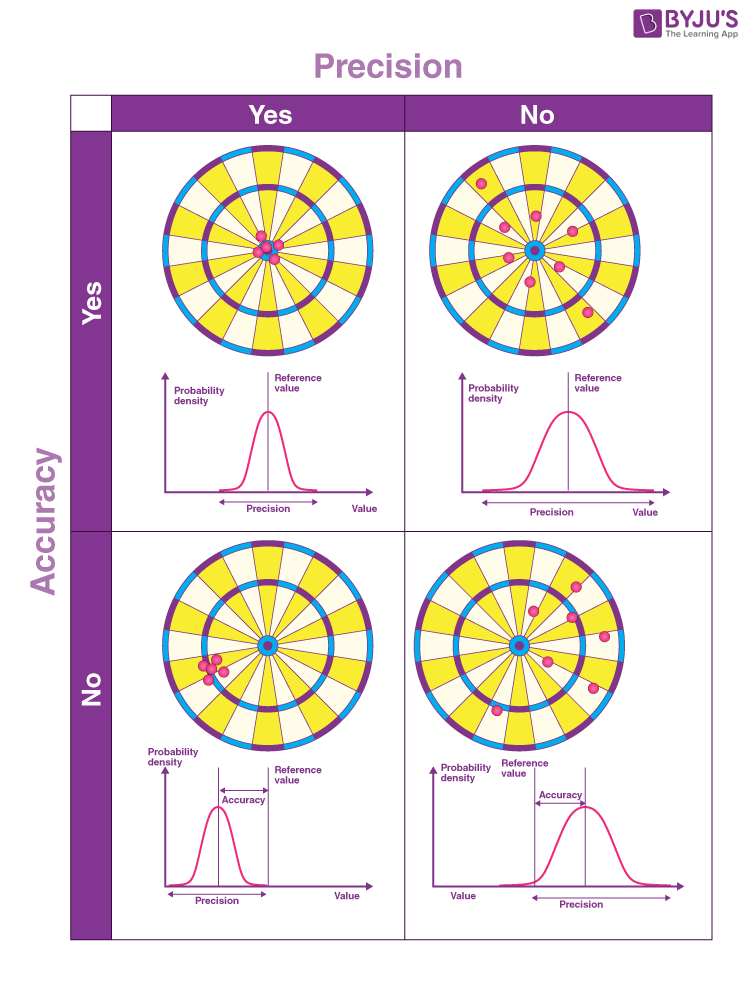

In [7]:
Image(nc.ACR_PRC_IMG_DIR)

We believe that Google paper (https://www.researchgate.net/publication/372074802_Personality_Traits_in_Large_Language_Models) shows High Precision and Low Accuracy when it comes to LLM’s understanding of personality. I am attempting to show this with the following data I’ve gathered over the summer. We see that off the shelf LLMs are become better and better each year, and they are becoming “naturally” accurate when assigned a personality profile.

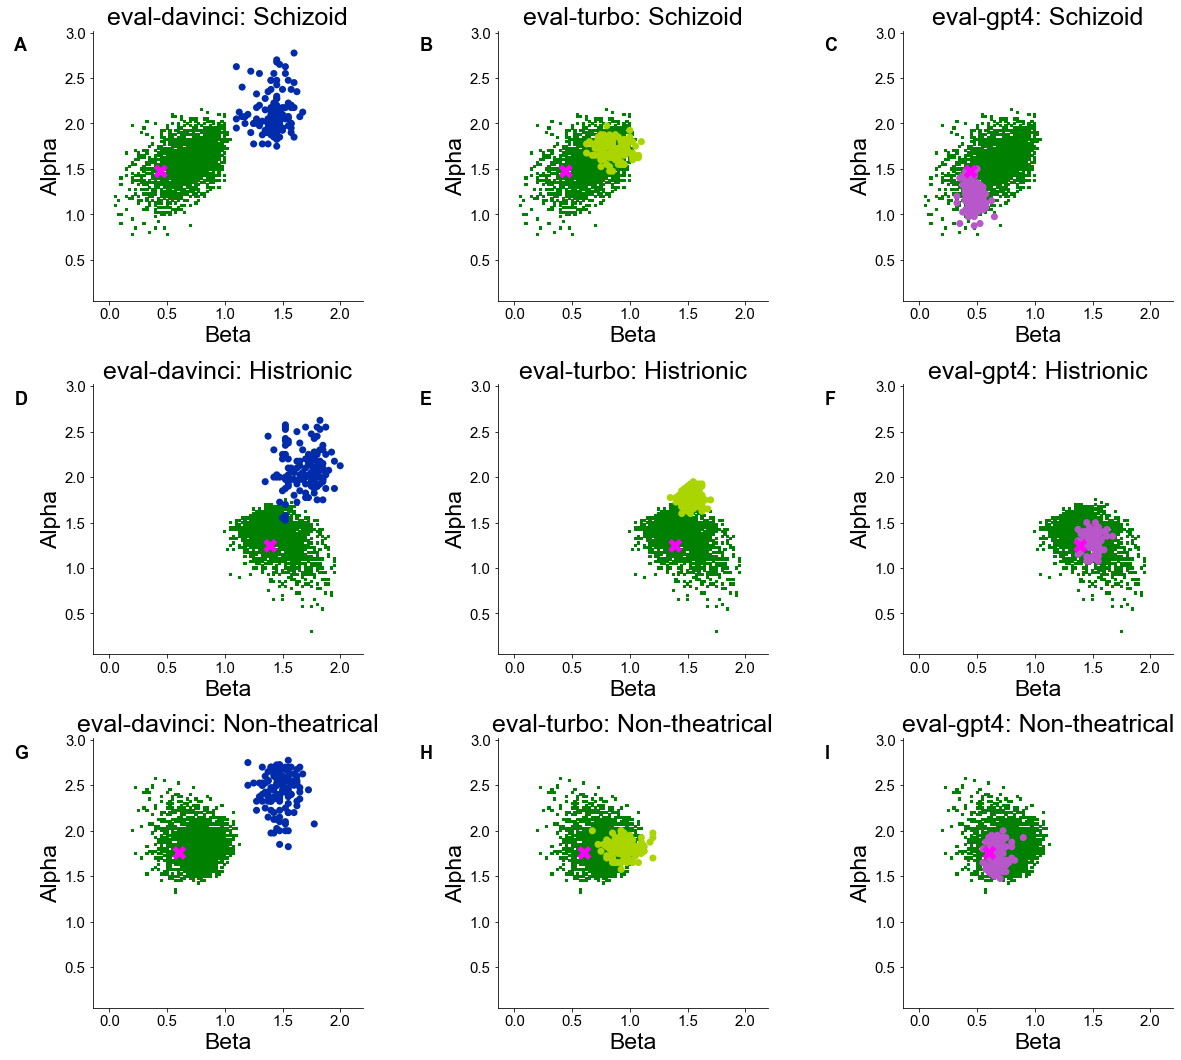

In [8]:
Image(nc.SMR_RES_IMG_DIR)

Thus, we hypothesis that an LLM’s feature, particularly the number of parameters, correlates with it’s accuracy of personality. We can show this by extending Google’s pipline by adding more Reliability and Validity metrics. Specifically, we will explore

<ul>
<li>	Validity </li>
    <ul>
    <li>	Known-Groups Validity </li>
        <ul>
        <li> Between-subjects statistics </li>
            <ul>
            <li> Normality and independent samples t-test (https://www.scalestatistics.com/normality-and-independent-samples-t-test.html) </li>
            </ul>
        </ul>
    <li>	Independent groups </li>
        <ul>
        <li> Human </li>
        <li> LLM </li>
        </ul> 
    <li>	Outcome scale of measurement </li>
        <ul>
        <li> Continuous – the distance from the result to the input profile </li>
        </ul>
    <li>	However, we are performing this multiple times for each profile type, and then grouping them based on Human sample or LLM sample </li>
    <li>	Confirmatory factor analysis (CFA)? </li>
    </ul>
<li>	Reliability </li>
    <ul>
    <li> Cronbach’s alpha (https://www.scalestatistics.com/cronbachs-alpha.html) </li>
        <ul>
        <li> calculating reliability coefficients for survey instruments that use Likert-type response sets. </li>
        <li> The criterion for an acceptable Cronbach's alpha coefficient is debated in the literature, but to be conservative, any alpha coefficient below .75 is a cause for concern. </li>
        <li> If possible, use the standardized alpha coefficient, which is an even more conservative method for calculating reliability. </li>
        </ul>
    <li> Inter-rater reliability – Kappa </li>
        <ul>
        <li> The Kappa statistic is utilized to generate this estimate of reliability between two raters on a categorical or ordinal outcome. Significant Kappa statistics are harder to find as the number of ratings, number of raters, and number of potential responses increases. </li>
        <li> 4-Rater Agreement: Unweighted Analysis of Raw Scores by Subgrouphttps://www.agreestat.com/examples/xlsx_cac_raw3rr_unweighted_subgroup.html  </li>
            <ul>
            <li> Each group would be the specific trait </li>
            <li> Each category is the selected Likert scale for the accompanying question </li>
            <li> Validity of our findings </li>
            </ul>
        </ul>
    <li> Use Bootstrap validation (https://www.scalestatistics.com/bootstrap-validation.html) </li>
    <li> Split-group validation with cross-validation </li>
    </ul>
</ul>

## Background Information

### Old 

Prominent video game corporations increasingly endeavor to integrate AC systems into their games. Corporations such as Square Enix, Worldwalker Games, and Eidos Sherbrooke are exploring the possibilities of AC and its assimilation into their gaming products ~/cite{boeda_ai_2021, austin_independent_2022, trachel_machine_2022}. These corporations employ AC to empower Non-Playable Characters (NPCs) to perceive and project emotions within their games. In executing this approach, these video game corporations experimented with emotive simulations for NPCs so that the player can recognize and empathize with the character. However, AC systems such as Popescu et al.'s GAMYGDALA, Shirvani \& Ware's emotional narrative planning system, and Klinkert and Clark's Artificial Psychosocial Framework (APF) \cite{popescu_gamygdala_2014, shirvani_formalization_2020, klinkert_artificial_2021}, are proficient in discerning, interpreting, processing, and simulating human emotional states between player and NPCs. Enhancing this pursuit for human-like NPCs is the integration of an LLM, which further improves the sophistication of dialogue generation and decision-making processes not only with the player but with other NPC interactions as well.

The advent of LLMs is paradigm shifting in the contemporary technological landscape. Many companies, such as Microsoft, Google, Meta, and Nvidia, are actively seizing opportunities to integrate LLMs into their products \cite{zhao_survey_2023}. However, this transition is not without its challenges, which include issues such as data hallucinations, memory limitations, and constrained accessibility of these models \cite{azamfirei_large_2023, wang_augmenting_2023}. These issues become magnified within the context of the video game industry. This sector is keen to employ LLMs to generate in-game content but encounters additional complications, including the assurance of correct behavior, potential ethical liabilities, and extensive retesting debugging scenarios \cite{takeyama_unexpected_2023}. These complexities, coupled with the initial challenges, have induced a level of hesitancy within the industry toward fully embracing LLMs \cite{millington_artificial_2019}. Nevertheless, the work conducted by Park et al., which highlights the development of Generative Agents, serves as a remarkable exemplar, demonstrating that the successful integration of an LLM system into video games is indeed achievable \cite{park_generative_2023}. With the integration of an LLM into a simulated village, Park et al. show NPCs understand their surroundings, plan their days with what they know, and spread information to share knowledge. To further push these NPCs to be believable humans, the game would integrate an AC system that provides psychometric values for the LLM to process alongside their knowledge representation and dissemination.

The primary objective of this research is to investigate the potential capability of an LLM to output the correct content of a character's psychological persona based on the input of psychometric values. AC systems are instrumental in providing these psychometric values, encompassing facets such as personality traits, emotional states, and the dynamics of relationships between game entities and other characters in the environment \cite{popescu_gamygdala_2014, shirvani_formalization_2020, klinkert_artificial_2021}. This paper lays out a crucial first step in this inquiry: discerning whether an LLM can effectively interact with and interpret these psychometric values, with an initial focus on personality information. Personality traits, whether based on popular psychological models such as the Big Five or other frameworks, can significantly impact a character's decisions, actions, and reactions within a game's narrative. Therefore, the capability of an LLM to properly utilize these traits can play a crucial role in creating characters that are not only believable but also possess a consistent behavioral pattern.

AC systems capitalize on personality models such as the Big Five, otherwise referred to as the Five Factor or OCEAN model, to represent a character's fundamental psychological composition within a game \cite{klinkert_artificial_2021}. This model comprises five diverse factors: \textbf{O}penness to novel experiences, \textbf{C}onscientiousness in tasks and interpersonal relationships, \textbf{E}xtraversion in social contexts, \textbf{A}greeableness towards diverse viewpoints and mutual understandings, and \textbf{N}euroticism in interpreting circumstances \cite{goldberg_development_1992}.

We postulate the potential benefits of incorporating a personality model with an LLM. These include optimizing prompt use, broad application of general knowledge, and providing dynamic character transformations within the video game. We hypothesize that an LLM can craft content consistent with the specified personality when instructing it to roleplay as a character using a well-researched personality framework, such as the Big Five. Representing the Big Five as a 5-tuple to prompt the LLM, we use fewer tokens to explain the expected personality for an NPC. Given the extensive array of internet-based data used to train an LLM, it is plausible that research related to the Big Five forms a portion of that data set, including examples of individuals exemplifying each personality factor. Consequently, the LLM can generate dialogue content aligned with a given personality. Moreover, it is vital to acknowledge that a character's personality will likely evolve as players engage with games. Accordingly, the content generated by these characters should mirror their evolving persona.

This research aims to facilitate game developers in creating NPCs that exhibit a higher degree of human-like behavior and characteristics. It could provide invaluable insights to game designers, aiding them in integrating and effectively using AC systems within their design process. This not only enhances the realism of the characters but also allows for the generation of more diverse and nuanced in-game interactions.

Incorporating personality profiles into LLMs is just the start. Including other aspects of AC systems, such as dynamic emotional states and social relationship metrics, can further provide an LLM with the necessary context to generate even more realistic, human-like behavior. This holistic approach can truly bring NPCs to life, making them more believable and immersive.

## Personality Representation

### Old

The Big Five breaks personalities into five categories: \textbf{O}penness, \textbf{C}onscientiousness, \textbf{E}xtraversion, \textbf{A}greeableness, and \textbf{N}euroticism, which are represented on a continuous scale ranging from zero to one. A score of one signifies the full expression of a particular trait, while zero implies the presence of the opposing attribute \cite{goldberg_development_1992}.

To illustrate, a score of 1.0 on the \textbf{O}penness dimension indicates that an individual exhibits high creativity, readily embraces novelty, is driven by tackling new challenges, and engages in abstract thought. Conversely, a score of 0.0 in the \textbf{O}penness factor signifies resistance to change, disinterest in novelty, reluctance to welcome new ideas, and a deficit in imaginative thinking. Therefore, the Openness factor can also be conceptualized as a spectrum ranging from cautious/consistent to inventive/curious, corresponding to zero and one, respectively.

However, it is important to note that the values assigned to any particular trait need not be restricted to the extremes of this scale. Instead, they can occupy any position within this range, providing an extensive, nuanced representation of personality traits. Consequently, the model spans five dimensions and is infinite along any axis, suggesting the potential for a virtually limitless array of personality combinations across these five factors.

Drawing on the work of Van Mensvoort, the Big Five can be discretized into 20 distinct personality profiles \cite{mensvoort_system_nodate}. This subdivision encompasses a range of behavioral characteristics, from negative behavioral disorders such as Paranoid and Schizoid, to positive behavioral traits including Accommodating and Laissez-faire. This fine-grained classification allows for a more precise and detailed depiction of personality, accommodating its complex, multifaceted nature.

These personality profiles discretize the Big Five to distinct points, shown in Figure 1, which enables one to label a particular personality configuration as one of the established profiles. This process identifies a specific categorization and imbues additional context into what the given personality configuration symbolizes. Moreover, these profiles, each denoting a general region within the model's domain, can serve as the foundation for a hierarchical structure.

Employing these profiles as categorical labels, we leverage human data to establish our Baseline in this research. This Baseline serves as a comparative standard against which we evaluate the performance of our methodology and the LLM's capacity to embody and express various character personalities. Thus, the defined profiles and our chosen baseline data inform our research approach and assist in objectively evaluating our outcomes.

## Data Collection

### Old

We investigate the results from a comprehensive Big Five personality dataset using the personality profiles. The dataset, derived from the Open-Source Psychometrics Project, comprises personality test results from over a million participants (n = 1,015,342) who responded to a 50-item Big Five personality test \cite{noauthor_open_nodate, goldberg_development_1992}. Each test item was a statement to which participants responded on a Likert scale, with one indicating a strong disagreement with the presented behavior and five denoting strong agreement. The dataset not only includes the results of the personality test but also records auxiliary information such as the time taken to complete the test, the number of attempts made by the same participant (identified based on IP address), geographical coordinates (latitude and longitude), race, and so forth.

We undertook a thorough data-cleaning process to optimize the dataset for our research. We first ensured that each test response included answers to all 50 statements. We further filtered the data to include only those responses that took more than 300 milliseconds to answer a question, as the average human response time ranges between 150 and 300 milliseconds, thus mitigating bot submissions to the analysis. Finally, we only retained the first submission from each unique IP address. Following these preparation steps, a total of 596,956 test results remained for our analysis. This extensive and robust dataset now forms the foundation for our subsequent investigations. You can find the cleaned version of the dataset within the provided repository.

The subsequent phase involved the evaluation of the personality test results. This evaluation was conducted based on a scoring key included with the test, accessed from the IPIP website \cite{goldberg_ipip_nodate}. Each statement in the test corresponds to a particular personality factor. As a participant assigns a Likert value to a given statement, that value is accumulated into a running total for the respective personality factor. The assigned value may be inverted based on the statement's wording directionality. For instance, a statement reflective of \textbf{E}xtraversion, such as "Don't talk a lot," possesses a negative direction, thereby necessitating the inversion of the corresponding response value. Consequently, a response of 5 for this statement would be translated into a value of 1.

Following the completion of this evaluation, each personality factor scores within a range of [10, 50]. These values are then mapped to a [0.0, 1.0] range using linear interpolation to normalize the scores for comparative analysis. The final output constitutes a 5-tuple vector representative of the values for each personality factor, (O,C,E,A,N). This detailed evaluation process ensures an accurate and comprehensive representation of an individual's personality configuration based on the Big Five model.

We executed the label assignment of a personality profile with the evaluated test results using a nearest-neighbor approach. For every test result represented as a 5-tuple vector, we calculated the Euclidean Distance to each of the 20 personality profiles. The personality profile with the smallest distance to the profile was identified as the corresponding label. 

The final preparatory procedure was conducting disproportionate sampling for each personality profile. As the goal of this research is not to replicate the profile distribution of the entire population but rather to examine the distribution of test results per personality profile, we opted for an equal representation across all profiles (m = 2525). Consequently, our baseline dataset incorporated a total of 50,500 test results, and the statistical description can be found in Table 1. This methodological approach ensures that each personality profile is adequately represented in our analysis, enabling a balanced and comprehensive investigation of how an LLM can interpret and utilize psychometric values. The subset version of the cleaned dataset can also be found in the provided repository.
 
From the works of Van Mensvoort's research, we projected the various personalities onto a two-dimensional plane by computing the values for Cognitive Stability (CS) and Cognitive Flexibility (CF) \cite{mensvoort_system_nodate} defined by Equation 1 and 2 respectively. In Equation 1, A is Agreeableness, C is Conscientiousness and S is Emotional Stability which is the inverse of N, Neuroticism. In Equation 2, E is Extraversion and O is Openness. 

This methodology allows us to visualize the distribution and interrelation of the various personality profiles within our baseline dataset. The resulting two-dimensional representation of the Big Five offers a clear and intuitive overview of the personality landscape, as illustrated in Figure 2. This approach not only affords an understanding of individual profiles but also elucidates the underlying relationships between various personality factors.

Figure 2 shows that each personality type forms a cluster around its corresponding profile, represented by the central X within each cluster. Beyond this evaluative visualization, we have also employed a dimensionality reduction technique, Linear Discriminant Analysis (LDA), to plot the 50-item personality test responses, shown in Figure 3. This method, once again, yielded distinct clusters that effectively distinguished between different personality profiles.

### New

#### Data Acquisition

### Primary Personality Test
#### IPIP NEO 300

In [9]:
PRIMARY_PERSONALITY_TEST = nc.PERSONALITY_TEST.IPIP_NEO_300
implementation_ipipNeo300 = tbpt.IpipNeo300()
profile_centroids = Centroids()

In [10]:
#Load test key and test responses
responses_ipipNeo300 = ptr.PersonalityFactorResponseSet(implementation_ipipNeo300)
loaded_key = responses_ipipNeo300.init_test_key(nc.IPIP_NEO_300_TEST_KEY_DIR)

try:
    responses_ipipNeo300.load(nc.IPIP_NEO_300_QUICKLOAD_DIR, "test_set")
except ValueError:
    print("Cannot locate quickload. Loading original file")
    responses_ipipNeo300.init_raw_responses_dir(nc.IPIP_NEO_300_TEST_RESPONSES_DIR)
    responses_ipipNeo300.eval_test_responses()
    
    responses_ipipNeo300.save(nc.IPIP_NEO_300_QUICKLOAD_DIR, "test_set")

In [11]:
#create dataframe of original data
df_test_responses = responses_ipipNeo300.get_dataframe(responses=True, evaluation=False, cscf=False, labels=responses_ipipNeo300.get_top_k_closest_centroid_list(1))


#with open(file=f"C:\\Users\\38977332\\OneDrive - Southern Methodist University\\Documents\\School\\APF\\Repos\\apf\\LLM_Personality\\fall_23\\notebooks\\results\\PersonalityTest.IPIP_NEO_300\\test_set/test_responses_labels.npy",mode="w") as f:
 #   np.save(file=f, arr=df_test_responses.to_numpy(), allow_pickle=True)    

df_test_responses.describe()

I0             I1             I2             I3  \
count  720288.000000  720288.000000  720288.000000  720288.000000   
mean        3.770071       3.492192       4.058832       3.224138   
std         1.116634       1.208174       1.007498       1.142546   
min         0.000000       0.000000       0.000000       0.000000   
25%         3.000000       3.000000       4.000000       2.000000   
50%         4.000000       4.000000       4.000000       3.000000   
75%         5.000000       4.000000       5.000000       4.000000   
max         5.000000       5.000000       5.000000       5.000000   

                  I4             I5             I6             I7  \
count  720288.000000  720288.000000  720288.000000  720288.000000   
mean        3.958151       2.808042       2.694090       3.866237   
std         0.946778       1.273177       1.361568       1.168267   
min         0.000000       0.000000       0.000000       0.000000   
25%         4.000000       2.000000       2.000000       3.000000   
50%         4.000000       3.000000       3.000000       4.000000   
75%         5.000000       4.000000       4.000000       5.000000   
max         5.000000       5.000000       5.000000       5.000000   

                  I8             I9  ...           I291           I292  \
count  720288.000000  720288.000000  ...  720288.000000  720288.000000   
mean        3.861975       3.811418  ...       3.695365       3.716508   
std         1.264685       1.034054  ...       1.280355       1.239372   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         3.000000       3.000000  ...       3.000000       3.000000   
50%         4.000000       4.000000  ...       4.000000       4.000000   
75%         5.000000       5.000000  ...       5.000000       5.000000   
max         5.000000       5.000000  ...       5.000000       5.000000   

                I293           I294           I295           I296  \
count  720288.000000  720288.000000  720288.000000  720288.000000   
mean        3.751977       2.926761       2.540227       3.972085   
std         1.172340       1.208497       1.154486       1.149800   
min         0.000000       0.000000       0.000000       0.000000   
25%         3.000000       2.000000       2.000000       4.000000   
50%         4.000000       3.000000       2.000000       4.000000   
75%         5.000000       4.000000       3.000000       5.000000   
max         5.000000       5.000000       5.000000       5.000000   

                I297           I298           I299             l0  
count  720288.000000  720288.000000  720288.000000  720288.000000  
mean        2.528339       3.240040       2.579997      10.483730  
std         1.422048       1.253937       1.286706       5.919656  
min         0.000000       0.000000       0.000000       0.000000  
25%         1.000000       2.000000       2.000000       6.000000  
50%         2.000000       3.000000       2.000000       8.000000  
75%         4.000000       4.000000       4.000000      18.000000  
max         5.000000       5.000000       5.000000      18.000000  

[8 rows x 301 columns]

:Overlay
   .Scatter.I     :Scatter   [Beta]   (Alpha,l0)
   .Scatter.II    :Scatter   [Beta]   (Alpha,Label)
   .Labels.I      :Labels   [Beta,Alpha]   (Label)
   .Scatter.III   :Scatter   [Beta]   (Alpha,Label)
   .Labels.II     :Labels   [Beta,Alpha]   (Label)
   .Scatter.IV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.III    :Labels   [Beta,Alpha]   (Label)
   .Scatter.V     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.V      :Labels   [Beta,Alpha]   (Label)
   .Scatter.VII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.VI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.VII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.IX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.VIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.X     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IX     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.X      :Labels   [Beta,Alpha]   (Label)
   .Scatter.XII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIV   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIV    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVI    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVIII :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIX   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVIII  :Labels   [Beta,Alpha]   (Label)
   .Scatter.XX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIX    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XXI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XX     :Labels   [Beta,Alpha]   (Label)
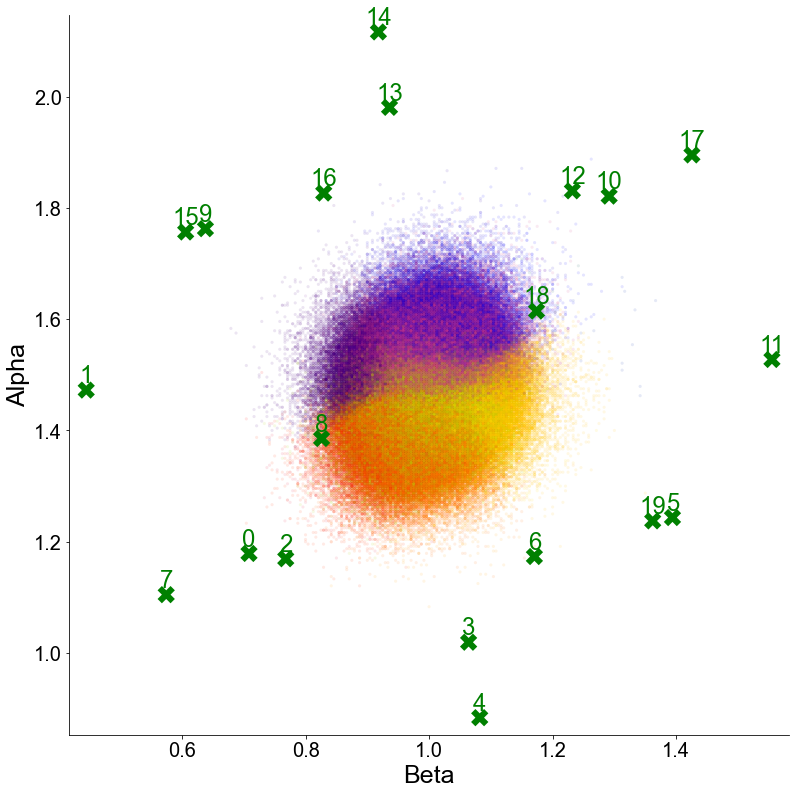

In [12]:
hv.output(responses_ipipNeo300.scatter_plot_cscf(show_profile_centers=True))

In [13]:
reverse_responses_ipipNeo300 = ptr.PersonalityFactorResponseSet(implementation_ipipNeo300)
loaded_key = reverse_responses_ipipNeo300.init_test_key(nc.IPIP_NEO_300_TEST_KEY_DIR)

# reverse scores so that all tests are conistently the same
df = responses_ipipNeo300.get_dataframe(responses=True, evaluation=False, cscf=False)

sign = [1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,-1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,-1,-1,1,1,1,1,1,1,1,-1,-1,1,-1,1,-1,-1,1,1,1,1,1,-1,1,-1,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1,-1,1,1,-1,-1,-1,-1,1,-1,-1,-1,1,1,-1,-1,-1,1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,-1,1,1,1,-1,-1,1,1,-1,-1,1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]

col_name = df.columns

for idx in range(len(col_name)):
    if sign[idx] == -1:
        df[col_name[idx]] = df[col_name[idx]].map({0:0, 1:5, 2:4, 3:3, 4:2, 5:1})
        
reverse_responses_ipipNeo300.init_raw_responses_pd(df)
reverse_responses_ipipNeo300.eval_test_responses()
reverse_responses_ipipNeo300.eval_centroid_similarity(profile_centroids)
reverse_responses_ipipNeo300.save(nc.IPIP_NEO_300_QUICKLOAD_DIR, "reverse_set")

Evaluating test responses:


In [14]:
df_test_responses = reverse_responses_ipipNeo300.get_dataframe(responses=True, evaluation=False, cscf=False)

#clean data, replace all 0's with 3's
for col_name in df_test_responses.columns:
    df_test_responses[col_name] = df_test_responses[col_name].replace(0,3)

df_test_responses.describe()

I0             I1             I2             I3  \
count  720288.000000  720288.000000  720288.000000  720288.000000   
mean        3.773840       3.496969       4.067695       3.233230   
std         1.108938       1.200262       0.984690       1.128705   
min         1.000000       1.000000       1.000000       1.000000   
25%         3.000000       3.000000       4.000000       2.000000   
50%         4.000000       4.000000       4.000000       3.000000   
75%         5.000000       4.000000       5.000000       4.000000   
max         5.000000       5.000000       5.000000       5.000000   

                  I4             I5             I6             I7  \
count  720288.000000  720288.000000  720288.000000  720288.000000   
mean        3.970767       2.818988       2.707947       3.880185   
std         0.913349       1.261834       1.349289       1.139580   
min         1.000000       1.000000       1.000000       1.000000   
25%         4.000000       2.000000       2.000000       3.000000   
50%         4.000000       3.000000       3.000000       4.000000   
75%         5.000000       4.000000       4.000000       5.000000   
max         5.000000       5.000000       5.000000       5.000000   

                  I8             I9  ...           I290           I291  \
count  720288.000000  720288.000000  ...  720288.000000  720288.000000   
mean        2.128292       3.828986  ...       2.510844       2.289858   
std         1.246336       0.993853  ...       1.125075       1.254674   
min         1.000000       1.000000  ...       1.000000       1.000000   
25%         1.000000       3.000000  ...       2.000000       1.000000   
50%         2.000000       4.000000  ...       2.000000       2.000000   
75%         3.000000       5.000000  ...       3.000000       3.000000   
max         5.000000       5.000000  ...       5.000000       5.000000   

                I292           I293           I294           I295  \
count  720288.000000  720288.000000  720288.000000  720288.000000   
mean        2.265991       2.236473       3.057524       3.444417   
std         1.207540       1.149882       1.189696       1.140462   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.000000       2.000000       3.000000   
50%         2.000000       2.000000       3.000000       4.000000   
75%         3.000000       3.000000       4.000000       4.000000   
max         5.000000       5.000000       5.000000       5.000000   

                I296           I297           I298           I299  
count  720288.000000  720288.000000  720288.000000  720288.000000  
mean        2.011284       3.456776       2.744579       3.382397  
std         1.113345       1.411164       1.232312       1.254181  
min         1.000000       1.000000       1.000000       1.000000  
25%         1.000000       2.000000       2.000000       2.000000  
50%         2.000000       4.000000       3.000000       4.000000  
75%         2.000000       5.000000       4.000000       4.000000  
max         5.000000       5.000000       5.000000       5.000000  

[8 rows x 300 columns]

In [15]:
clean_responses_ipipNeo300 = ptr.PersonalityFactorResponseSet(implementation_ipipNeo300)
loaded_key = clean_responses_ipipNeo300.init_test_key(nc.IPIP_NEO_300_TEST_KEY_DIR)

#try:
#clean_responses_ipipNeo300.load(nc.IPIP_NEO_300_QUICKLOAD_DIR, "clean_set")
#except ValueError:
#    print("Cannot locate quickload. Loading original file")
clean_responses_ipipNeo300.init_raw_responses_pd(df_test_responses)
clean_responses_ipipNeo300.eval_test_responses()
clean_responses_ipipNeo300.eval_centroid_similarity(profile_centroids)
clean_responses_ipipNeo300.save(nc.IPIP_NEO_300_QUICKLOAD_DIR, "clean_set")

Evaluating test responses:


In [16]:
clean_responses_ipipNeo300.get_dataframe(responses=False, evaluation=True, cscf=False, labels=clean_responses_ipipNeo300.get_top_k_closest_centroid_list(1)).describe()

OPENNESS  CONSCIENTIOUSNESS   EXTRAVERSION  AGREEABLENESS  \
count  720288.000000      720288.000000  720288.000000  720288.000000   
mean        0.669285           0.639934       0.573170       0.629259   
std         0.108114           0.133843       0.136024       0.116312   
min         0.066667           0.008333       0.000000       0.000000   
25%         0.595833           0.550000       0.483333       0.558333   
50%         0.670833           0.645833       0.579167       0.637500   
75%         0.745833           0.733333       0.670833       0.708333   
max         1.000000           1.000000       1.000000       1.000000   

         NEUROTICISM             l0  
count  720288.000000  720288.000000  
mean        0.476707      11.390728  
std         0.162032       3.792971  
min         0.000000       0.000000  
25%         0.362500      10.000000  
50%         0.475000      12.000000  
75%         0.587500      13.000000  
max         1.000000      19.000000

:Overlay
   .Scatter.I     :Scatter   [Beta]   (Alpha,l0)
   .Scatter.II    :Scatter   [Beta]   (Alpha,Label)
   .Labels.I      :Labels   [Beta,Alpha]   (Label)
   .Scatter.III   :Scatter   [Beta]   (Alpha,Label)
   .Labels.II     :Labels   [Beta,Alpha]   (Label)
   .Scatter.IV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.III    :Labels   [Beta,Alpha]   (Label)
   .Scatter.V     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.V      :Labels   [Beta,Alpha]   (Label)
   .Scatter.VII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.VI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.VII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.IX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.VIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.X     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IX     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.X      :Labels   [Beta,Alpha]   (Label)
   .Scatter.XII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIV   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIV    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVI    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVIII :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIX   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVIII  :Labels   [Beta,Alpha]   (Label)
   .Scatter.XX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIX    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XXI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XX     :Labels   [Beta,Alpha]   (Label)
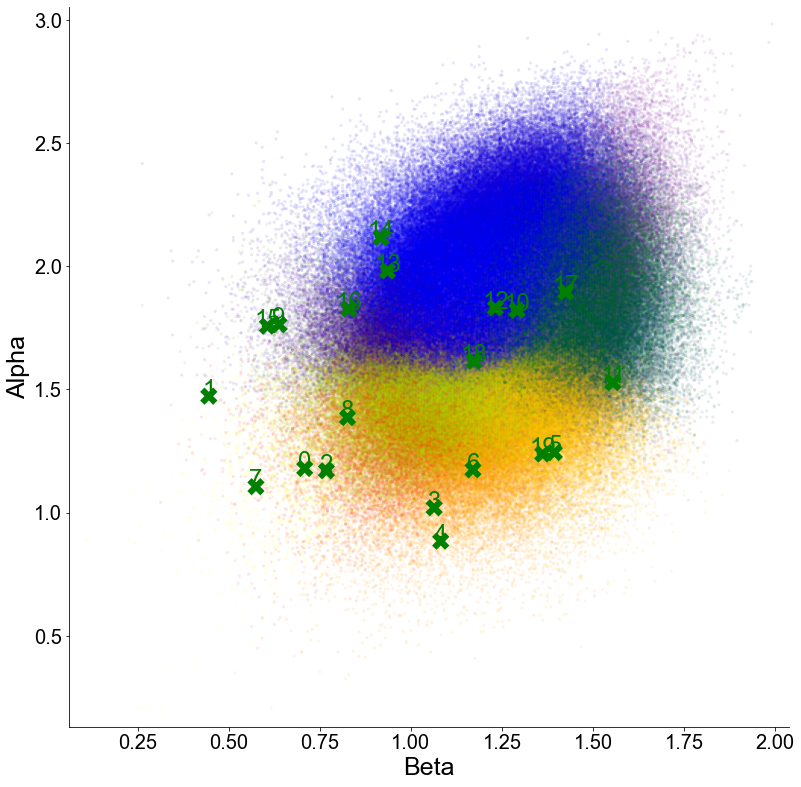

In [17]:
hv.output(clean_responses_ipipNeo300.scatter_plot_cscf(show_profile_centers=True))

In [18]:
df_subset_responses = clean_responses_ipipNeo300.get_dataframe(responses=True, evaluation=True, cscf=True, labels=clean_responses_ipipNeo300.get_top_k_closest_centroid_list(1))
df_subset_responses.describe()

I0             I1             I2             I3  \
count  720288.000000  720288.000000  720288.000000  720288.000000   
mean        3.773840       3.496969       4.067695       3.233230   
std         1.108938       1.200262       0.984690       1.128705   
min         1.000000       1.000000       1.000000       1.000000   
25%         3.000000       3.000000       4.000000       2.000000   
50%         4.000000       4.000000       4.000000       3.000000   
75%         5.000000       4.000000       5.000000       4.000000   
max         5.000000       5.000000       5.000000       5.000000   

                  I4             I5             I6             I7  \
count  720288.000000  720288.000000  720288.000000  720288.000000   
mean        3.970767       2.818988       2.707947       3.880185   
std         0.913349       1.261834       1.349289       1.139580   
min         1.000000       1.000000       1.000000       1.000000   
25%         4.000000       2.000000       2.000000       3.000000   
50%         4.000000       3.000000       3.000000       4.000000   
75%         5.000000       4.000000       4.000000       5.000000   
max         5.000000       5.000000       5.000000       5.000000   

                  I8             I9  ...           I298           I299  \
count  720288.000000  720288.000000  ...  720288.000000  720288.000000   
mean        2.128292       3.828986  ...       2.744579       3.382397   
std         1.246336       0.993853  ...       1.232312       1.254181   
min         1.000000       1.000000  ...       1.000000       1.000000   
25%         1.000000       3.000000  ...       2.000000       2.000000   
50%         2.000000       4.000000  ...       3.000000       4.000000   
75%         3.000000       5.000000  ...       4.000000       4.000000   
max         5.000000       5.000000  ...       5.000000       5.000000   

            OPENNESS  CONSCIENTIOUSNESS   EXTRAVERSION  AGREEABLENESS  \
count  720288.000000      720288.000000  720288.000000  720288.000000   
mean        0.669285           0.639934       0.573170       0.629259   
std         0.108114           0.133843       0.136024       0.116312   
min         0.066667           0.008333       0.000000       0.000000   
25%         0.595833           0.550000       0.483333       0.558333   
50%         0.670833           0.645833       0.579167       0.637500   
75%         0.745833           0.733333       0.670833       0.708333   
max         1.000000           1.000000       1.000000       1.000000   

         NEUROTICISM          Alpha           Beta             l0  
count  720288.000000  720288.000000  720288.000000  720288.000000  
mean        0.476707       1.792486       1.242455      11.390728  
std         0.162032       0.306415       0.192214       3.792971  
min         0.000000       0.200000       0.108333       0.000000  
25%         0.362500       1.587500       1.116667      10.000000  
50%         0.475000       1.795833       1.245833      12.000000  
75%         0.587500       2.000000       1.375000      13.000000  
max         1.000000       2.983333       1.991667      19.000000  

[8 rows x 308 columns]

In [19]:
N_SAMPLING = 225
df_test_responses_subset = df_subset_responses.groupby('l0', group_keys=False).apply(lambda x: x.sample(N_SAMPLING))
df_test_responses_subset.describe()

I0           I1           I2           I3           I4  \
count  4500.000000  4500.000000  4500.000000  4500.000000  4500.000000   
mean      3.703111     2.976889     3.983333     2.749778     3.700444   
std       1.231158     1.378203     1.115247     1.242738     1.113896   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       3.000000     2.000000     3.000000     2.000000     3.000000   
50%       4.000000     3.000000     4.000000     3.000000     4.000000   
75%       5.000000     4.000000     5.000000     4.000000     5.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

                I5           I6           I7           I8           I9  ...  \
count  4500.000000  4500.000000  4500.000000  4500.000000  4500.000000  ...   
mean      3.053556     2.399111     3.669333     2.447333     3.694444  ...   
std       1.356624     1.401837     1.312986     1.383107     1.119535  ...   
min       1.000000     1.000000     1.000000     1.000000     1.000000  ...   
25%       2.000000     1.000000     3.000000     1.000000     3.000000  ...   
50%       3.000000     2.000000     4.000000     2.000000     4.000000  ...   
75%       4.000000     4.000000     5.000000     4.000000     5.000000  ...   
max       5.000000     5.000000     5.000000     5.000000     5.000000  ...   

             I298         I299     OPENNESS  CONSCIENTIOUSNESS  EXTRAVERSION  \
count  4500.00000  4500.000000  4500.000000        4500.000000   4500.000000   
mean      3.08400     3.374889     0.637444           0.585353      0.500413   
std       1.34545     1.359282     0.134865           0.162235      0.178854   
min       1.00000     1.000000     0.150000           0.095833      0.004167   
25%       2.00000     2.000000     0.545833           0.470833      0.370833   
50%       3.00000     4.000000     0.645833           0.587500      0.504167   
75%       4.00000     4.000000     0.737500           0.704167      0.637500   
max       5.00000     5.000000     1.000000           1.000000      0.941667   

       AGREEABLENESS  NEUROTICISM        Alpha         Beta           l0  
count    4500.000000  4500.000000  4500.000000  4500.000000  4500.000000  
mean        0.541832     0.513984     1.613201     1.137857     9.500000  
std         0.147175     0.183861     0.350578     0.266730     5.766922  
min         0.058333     0.016667     0.416667     0.312500     0.000000  
25%         0.437500     0.395833     1.362500     0.950000     4.750000  
50%         0.550000     0.525000     1.587500     1.158333     9.500000  
75%         0.650000     0.633333     1.829167     1.333333    14.250000  
max         0.908333     0.979167     2.795833     1.912500    19.000000  

[8 rows x 308 columns]

In [20]:
clean_subset_responses_ipipNeo300 = ptr.PersonalityFactorResponseSet(implementation_ipipNeo300)
loaded_key = clean_subset_responses_ipipNeo300.init_test_key(nc.IPIP_NEO_300_TEST_KEY_DIR)

#try:
#    clean_subset_responses_ipipNeo300.load(nc.IPIP_NEO_300_QUICKLOAD_DIR, "clean_set")
#except ValueError:
#    print("Cannot locate quickload. Loading original file")
clean_subset_responses_ipipNeo300.init_raw_responses_pd(df_test_responses_subset)
clean_subset_responses_ipipNeo300.eval_test_responses()
clean_subset_responses_ipipNeo300.eval_centroid_similarity(profile_centroids)
clean_subset_responses_ipipNeo300.save(nc.IPIP_NEO_300_QUICKLOAD_DIR, "clean_subset_225")

Evaluating test responses:


In [21]:
clean_subset_responses_ipipNeo300.get_dataframe(responses=False, evaluation=False, cscf=True).describe()

Alpha         Beta
count  4500.000000  4500.000000
mean      1.613201     1.137857
std       0.350578     0.266730
min       0.416667     0.312500
25%       1.362500     0.950000
50%       1.587500     1.158333
75%       1.829167     1.333333
max       2.795833     1.912500

In [22]:
clean_subset_responses_ipipNeo300.get_dataframe(responses=False, evaluation=False, cscf=False, labels=clean_subset_responses_ipipNeo300.get_top_k_closest_centroid_list(1)).describe()

l0
count  4500.000000
mean      9.500000
std       5.766922
min       0.000000
25%       4.750000
50%       9.500000
75%      14.250000
max      19.000000

:Overlay
   .Scatter.I     :Scatter   [Beta]   (Alpha,l0)
   .Scatter.II    :Scatter   [Beta]   (Alpha,Label)
   .Labels.I      :Labels   [Beta,Alpha]   (Label)
   .Scatter.III   :Scatter   [Beta]   (Alpha,Label)
   .Labels.II     :Labels   [Beta,Alpha]   (Label)
   .Scatter.IV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.III    :Labels   [Beta,Alpha]   (Label)
   .Scatter.V     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.V      :Labels   [Beta,Alpha]   (Label)
   .Scatter.VII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.VI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.VII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.IX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.VIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.X     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IX     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.X      :Labels   [Beta,Alpha]   (Label)
   .Scatter.XII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIV   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIV    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVI    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVIII :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIX   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVIII  :Labels   [Beta,Alpha]   (Label)
   .Scatter.XX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIX    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XXI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XX     :Labels   [Beta,Alpha]   (Label)
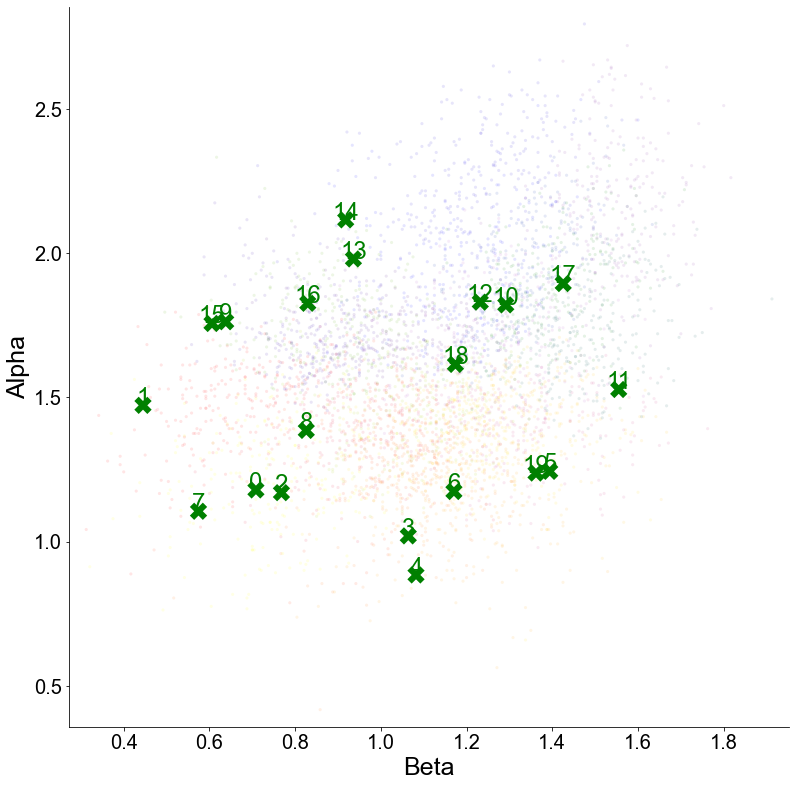

In [23]:
hv.output(clean_subset_responses_ipipNeo300.scatter_plot_cscf(show_profile_centers=True))

### IPIP Neo 120 (created from IPIP neo 120)

In [24]:
PRIMARY_PERSONALITY_TEST = nc.PERSONALITY_TEST.IPIP_NEO_120
implementation_ipipNeo120= tbpt.IpipNeo120()
profile_centroids = Centroids()

clean_responses_ipip120 = ptr.PersonalityFactorResponseSet(implementation_ipipNeo120)
loaded_key = clean_responses_ipip120.init_test_key(nc.IPIP_NEO_120_TEST_KEY_DIR)

#try:
    #clean_responses_ipip120.load(nc.IPIP_NEO_60_QUICKLOAD_DIR, "test_set")
#except ValueError:
    #print("Cannot locate quickload. Loading original file")
df_responses_ipipNeo120 = clean_responses_ipipNeo300.get_dataframe(responses=True, evaluation=False, cscf=False, labels=None, columns=np.array([1, 2, 3, 4, 5, 6, 7, 8, 99, 40, 11, 12, 13, 74, 45, 76, 17, 18, 169, 50, 111, 22, 53, 144, 55, 26, 27, 28, 29, 120, 31, 62, 33, 34, 35, 36, 37, 68, 159, 160, 41, 42, 43, 104, 105, 106, 47, 138, 199, 140, 171, 52, 203, 174, 145, 56, 57, 58, 59, 150, 61, 212, 63, 64, 65, 126, 157, 188, 249, 190, 71, 132, 223, 194, 165, 136, 77, 168, 229, 260, 201, 142, 233, 204, 205, 86, 147, 148, 149, 210, 91, 272, 93, 184, 155, 216, 247, 218, 279, 220, 251, 162, 283, 284, 195, 256, 167, 288, 259, 290, 231, 172, 263, 264, 265, 176, 177, 268, 239, 270], dtype=np.uint64))
clean_responses_ipip120.init_raw_responses_pd(df_responses_ipipNeo120)
clean_responses_ipip120.eval_test_responses()
clean_responses_ipip120.eval_centroid_similarity(profile_centroids)
clean_responses_ipip120.save(nc.IPIP_NEO_120_QUICKLOAD_DIR, "clean_set")

Evaluating test responses:


:Overlay
   .Scatter.I     :Scatter   [Beta]   (Alpha,l0)
   .Scatter.II    :Scatter   [Beta]   (Alpha,Label)
   .Labels.I      :Labels   [Beta,Alpha]   (Label)
   .Scatter.III   :Scatter   [Beta]   (Alpha,Label)
   .Labels.II     :Labels   [Beta,Alpha]   (Label)
   .Scatter.IV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.III    :Labels   [Beta,Alpha]   (Label)
   .Scatter.V     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.V      :Labels   [Beta,Alpha]   (Label)
   .Scatter.VII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.VI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.VII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.IX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.VIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.X     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IX     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.X      :Labels   [Beta,Alpha]   (Label)
   .Scatter.XII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIV   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIV    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVI    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVIII :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIX   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVIII  :Labels   [Beta,Alpha]   (Label)
   .Scatter.XX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIX    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XXI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XX     :Labels   [Beta,Alpha]   (Label)
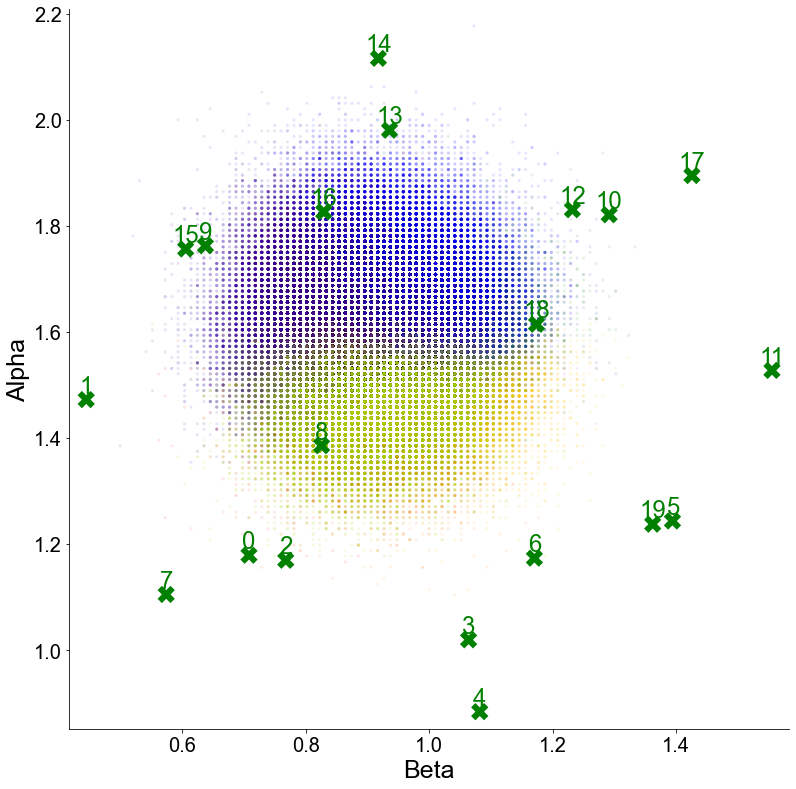

In [25]:
hv.output(clean_responses_ipip120.scatter_plot_cscf(show_profile_centers=True))

In [26]:
df_subset_responses = clean_responses_ipip120.get_dataframe(responses=True, evaluation=True, cscf=True, labels=clean_responses_ipip120.get_top_k_closest_centroid_list(1))
df_subset_responses.describe()

I0             I1             I2             I3  \
count  720288.000000  720288.000000  720288.000000  720288.000000   
mean        3.496969       4.067695       3.233230       3.970767   
std         1.200262       0.984690       1.128705       0.913349   
min         1.000000       1.000000       1.000000       1.000000   
25%         3.000000       4.000000       2.000000       4.000000   
50%         4.000000       4.000000       3.000000       4.000000   
75%         4.000000       5.000000       4.000000       5.000000   
max         5.000000       5.000000       5.000000       5.000000   

                  I4             I5             I6             I7  \
count  720288.000000  720288.000000  720288.000000  720288.000000   
mean        2.818988       2.707947       3.880185       2.128292   
std         1.261834       1.349289       1.139580       1.246336   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       2.000000       3.000000       1.000000   
50%         3.000000       3.000000       4.000000       2.000000   
75%         4.000000       4.000000       5.000000       3.000000   
max         5.000000       5.000000       5.000000       5.000000   

                  I8             I9  ...           I118           I119  \
count  720288.000000  720288.000000  ...  720288.000000  720288.000000   
mean        2.517976       2.460394  ...       2.825538       3.663793   
std         1.101140       1.312006  ...       1.301775       1.051789   
min         1.000000       1.000000  ...       1.000000       1.000000   
25%         2.000000       1.000000  ...       2.000000       3.000000   
50%         2.000000       2.000000  ...       3.000000       4.000000   
75%         3.000000       4.000000  ...       4.000000       4.000000   
max         5.000000       5.000000  ...       5.000000       5.000000   

            OPENNESS  CONSCIENTIOUSNESS   EXTRAVERSION  AGREEABLENESS  \
count  720288.000000      720288.000000  720288.000000  720288.000000   
mean        0.449645           0.517235       0.468606       0.594388   
std         0.051776           0.052122       0.058651       0.054340   
min         0.177083           0.218750       0.166667       0.291667   
25%         0.416667           0.479167       0.427083       0.562500   
50%         0.447917           0.520833       0.468750       0.593750   
75%         0.479167           0.552083       0.510417       0.625000   
max         0.739583           0.791667       0.791667       0.885417   

         NEUROTICISM          Alpha           Beta             l0  
count  720288.000000  720288.000000  720288.000000  720288.000000  
mean        0.524031       1.587592       0.918251      12.128839  
std         0.061508       0.097679       0.080618       3.666919  
min         0.166667       1.104167       0.500000       0.000000  
25%         0.489583       1.520833       0.864583       8.000000  
50%         0.531250       1.583333       0.916667      13.000000  
75%         0.562500       1.656250       0.968750      16.000000  
max         0.833333       2.177083       1.333333      19.000000  

[8 rows x 128 columns]

In [27]:
N_SAMPLING = 23
df_test_responses_subset = df_subset_responses.groupby('l0', group_keys=False).apply(lambda x: x.sample(N_SAMPLING))
df_test_responses_subset.describe()

I0          I1          I2          I3          I4          I5  \
count  414.000000  414.000000  414.000000  414.000000  414.000000  414.000000   
mean     3.338164    3.920290    3.009662    3.828502    3.057971    2.908213   
std      1.378367    1.243257    1.347549    1.058602    1.496249    1.520252   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    3.000000    2.000000    3.000000    2.000000    1.000000   
50%      4.000000    4.000000    3.000000    4.000000    3.000000    3.000000   
75%      4.000000    5.000000    4.000000    5.000000    4.000000    4.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

               I6          I7          I8          I9  ...        I118  \
count  414.000000  414.000000  414.000000  414.000000  ...  414.000000   
mean     3.809179    2.434783    2.649758    2.492754  ...    3.413043   
std      1.284971    1.444484    1.322386    1.440909  ...    1.429853   
min      1.000000    1.000000    1.000000    1.000000  ...    1.000000   
25%      3.000000    1.000000    2.000000    1.000000  ...    2.000000   
50%      4.000000    2.000000    2.000000    2.000000  ...    4.000000   
75%      5.000000    4.000000    4.000000    4.000000  ...    5.000000   
max      5.000000    5.000000    5.000000    5.000000  ...    5.000000   

             I119    OPENNESS  CONSCIENTIOUSNESS  EXTRAVERSION  AGREEABLENESS  \
count  414.000000  414.000000         414.000000    414.000000     414.000000   
mean     3.809179    0.469731           0.496326      0.492074       0.536584   
std      1.151823    0.074196           0.089132      0.098300       0.082556   
min      1.000000    0.291667           0.250000      0.208333       0.302083   
25%      3.000000    0.416667           0.447917      0.427083       0.468750   
50%      4.000000    0.468750           0.500000      0.489583       0.541667   
75%      5.000000    0.520833           0.541667      0.562500       0.593750   
max      5.000000    0.666667           0.760417      0.750000       0.802083   

       NEUROTICISM       Alpha        Beta          l0  
count   414.000000  414.000000  414.000000  414.000000  
mean      0.506718    1.526193    0.961806    9.222222  
std       0.095171    0.146342    0.141742    5.785838  
min       0.281250    1.104167    0.562500    0.000000  
25%       0.458333    1.437500    0.864583    4.000000  
50%       0.510417    1.520833    0.958333    9.500000  
75%       0.562500    1.625000    1.062500   14.000000  
max       0.791667    1.968750    1.322917   19.000000  

[8 rows x 128 columns]

In [29]:
clean_subset_responses_ipipNeo120 = ptr.PersonalityFactorResponseSet(implementation_ipipNeo120)
loaded_key = clean_subset_responses_ipipNeo120.init_test_key(nc.IPIP_NEO_120_TEST_KEY_DIR)

#try:
#    clean_subset_responses_ipipNeo300.load(nc.IPIP_NEO_300_QUICKLOAD_DIR, "clean_set")
#except ValueError:
#    print("Cannot locate quickload. Loading original file")
clean_subset_responses_ipipNeo120.init_raw_responses_pd(df_test_responses_subset)
clean_subset_responses_ipipNeo120.eval_test_responses()
clean_subset_responses_ipipNeo120.eval_centroid_similarity(profile_centroids)
clean_subset_responses_ipipNeo120.save(nc.IPIP_NEO_120_QUICKLOAD_DIR, "clean_subset_23")

Evaluating test responses:


:Overlay
   .Scatter.I     :Scatter   [Beta]   (Alpha,l0)
   .Scatter.II    :Scatter   [Beta]   (Alpha,Label)
   .Labels.I      :Labels   [Beta,Alpha]   (Label)
   .Scatter.III   :Scatter   [Beta]   (Alpha,Label)
   .Labels.II     :Labels   [Beta,Alpha]   (Label)
   .Scatter.IV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.III    :Labels   [Beta,Alpha]   (Label)
   .Scatter.V     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.V      :Labels   [Beta,Alpha]   (Label)
   .Scatter.VII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.VI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.VII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.IX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.VIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.X     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IX     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.X      :Labels   [Beta,Alpha]   (Label)
   .Scatter.XII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIV   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIV    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVI    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVIII :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIX   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVIII  :Labels   [Beta,Alpha]   (Label)
   .Scatter.XX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIX    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XXI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XX     :Labels   [Beta,Alpha]   (Label)
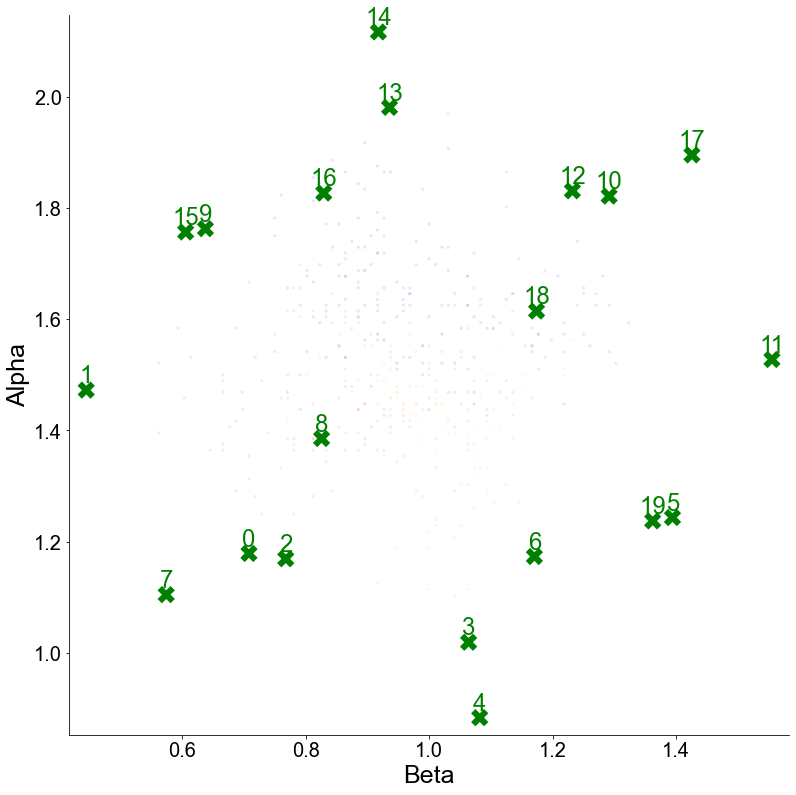

In [30]:
hv.output(clean_subset_responses_ipipNeo120.scatter_plot_cscf(show_profile_centers=True))

#### IPIP Neo 60 (created from IPIP neo 300) 

In [ ]:
# creating the IPIP_neo_60 dataset from the 300 dataset
#df_responses_ipipNeo60 = responses_ipipNeo300.get_dataframe(responses=True, evaluation=False, cscf=False, labels=None, columns=numpy.array([1, 91, 6, 126, 11, 41, 76, 16, 171, 231, 176, 296, 2, 92, 7, 247, 12, 42, 17, 47, 22, 52, 57, 147, 3, 63, 8, 158, 13, 193, 138, 198, 203, 263, 28, 118, 4, 34, 159, 249, 74, 104, 229, 259, 144, 174, 29, 59, 65, 155, 40, 190, 105, 195, 50, 170, 145, 265, 150, 270], dtype=numpy.uint16))
# testing out code

In [31]:
PRIMARY_PERSONALITY_TEST = nc.PERSONALITY_TEST.IPIP_NEO_60
implementation_ipipNeo60= tbpt.IpipNeo60()
profile_centroids = Centroids()

responses_ipip60 = ptr.PersonalityFactorResponseSet(implementation_ipipNeo60)
loaded_key = responses_ipip60.init_test_key(nc.IPIP_NEO_60_TEST_KEY_DIR)

#try:
#    responses_ipip60.load(nc.IPIP_NEO_60_QUICKLOAD_DIR, "test_set")
#except ValueError:
#    print("Cannot locate quickload. Loading original file")
df_responses_ipipNeo60 = clean_responses_ipipNeo300.get_dataframe(responses=True, evaluation=False, cscf=False, labels=None, columns=np.array([1, 91, 6, 126, 11, 41, 76, 16, 171, 231, 176, 296, 2, 92, 7, 247, 12, 42, 17, 47, 22, 52, 57, 147, 3, 63, 8, 158, 13, 193, 138, 198, 203, 263, 28, 118, 4, 34, 159, 249, 74, 104, 229, 259, 144, 174, 29, 59, 65, 155, 40, 190, 105, 195, 50, 170, 145, 265, 150, 270], dtype=np.uint16))
responses_ipip60.init_raw_responses_pd(df_responses_ipipNeo60)
#responses_ipip60.init_raw_responses_dir(nc.IPIP_NEO_60_TEST_RESPONSES_DIR)
responses_ipip60.eval_test_responses()
responses_ipip60.eval_centroid_similarity(profile_centroids)
responses_ipip60.save(nc.IPIP_NEO_60_QUICKLOAD_DIR, "clean_set")

Evaluating test responses:


:Overlay
   .Scatter.I     :Scatter   [Beta]   (Alpha,l0)
   .Scatter.II    :Scatter   [Beta]   (Alpha,Label)
   .Labels.I      :Labels   [Beta,Alpha]   (Label)
   .Scatter.III   :Scatter   [Beta]   (Alpha,Label)
   .Labels.II     :Labels   [Beta,Alpha]   (Label)
   .Scatter.IV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.III    :Labels   [Beta,Alpha]   (Label)
   .Scatter.V     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.V      :Labels   [Beta,Alpha]   (Label)
   .Scatter.VII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.VI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.VII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.IX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.VIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.X     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IX     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.X      :Labels   [Beta,Alpha]   (Label)
   .Scatter.XII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIV   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIV    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVI    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVIII :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIX   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVIII  :Labels   [Beta,Alpha]   (Label)
   .Scatter.XX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIX    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XXI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XX     :Labels   [Beta,Alpha]   (Label)
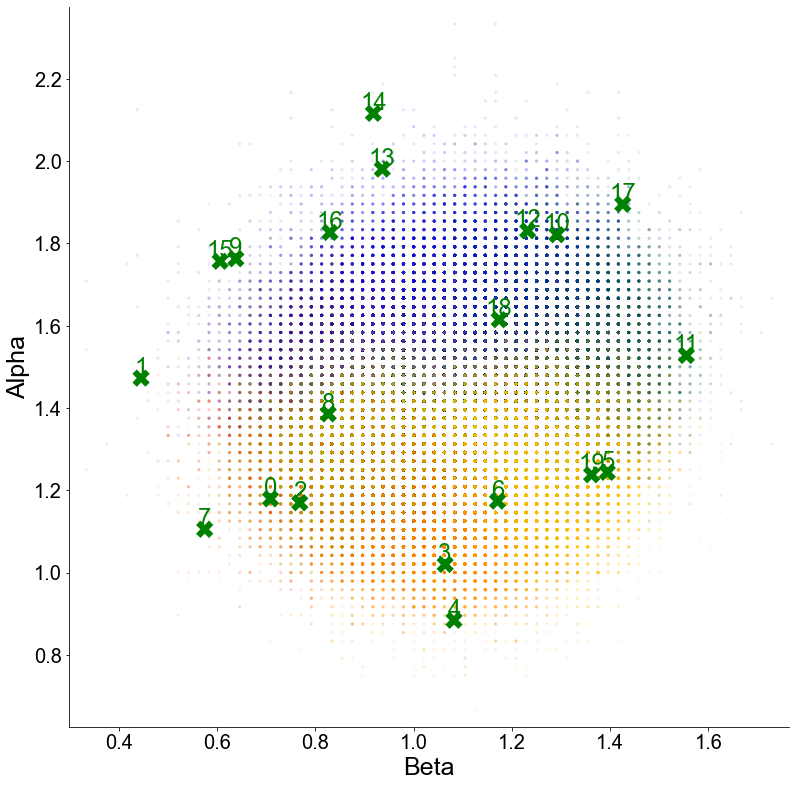

In [32]:
hv.output(responses_ipip60.scatter_plot_cscf(show_profile_centers=True))

In [33]:
df_subset_responses = responses_ipip60.get_dataframe(responses=True, evaluation=True, cscf=True, labels=responses_ipip60.get_top_k_closest_centroid_list(1))
df_subset_responses.describe()

I0             I1             I2             I3  \
count  720288.000000  720288.000000  720288.000000  720288.000000   
mean        3.496969       2.366653       2.707947       3.221699   
std         1.200262       1.049669       1.349289       1.348119   
min         1.000000       1.000000       1.000000       1.000000   
25%         3.000000       2.000000       2.000000       2.000000   
50%         4.000000       2.000000       3.000000       3.000000   
75%         4.000000       3.000000       4.000000       4.000000   
max         5.000000       5.000000       5.000000       5.000000   

                  I4             I5             I6             I7  \
count  720288.000000  720288.000000  720288.000000  720288.000000   
mean        3.571552       3.447829       3.224281       3.328941   
std         1.064174       1.122313       1.214390       1.151738   
min         1.000000       1.000000       1.000000       1.000000   
25%         3.000000       3.000000       2.000000       2.000000   
50%         4.000000       4.000000       3.000000       3.000000   
75%         4.000000       4.000000       4.000000       4.000000   
max         5.000000       5.000000       5.000000       5.000000   

                  I8             I9  ...            I58            I59  \
count  720288.000000  720288.000000  ...  720288.000000  720288.000000   
mean        2.529241       2.221893  ...       3.054382       3.663793   
std         1.280635       1.212227  ...       1.240924       1.051789   
min         1.000000       1.000000  ...       1.000000       1.000000   
25%         1.000000       1.000000  ...       2.000000       3.000000   
50%         2.000000       2.000000  ...       3.000000       4.000000   
75%         4.000000       3.000000  ...       4.000000       4.000000   
max         5.000000       5.000000  ...       5.000000       5.000000   

            OPENNESS  CONSCIENTIOUSNESS   EXTRAVERSION  AGREEABLENESS  \
count  720288.000000      720288.000000  720288.000000  720288.000000   
mean        0.483408           0.456491       0.615977       0.512370   
std         0.080150           0.095450       0.098855       0.077625   
min         0.083333           0.000000       0.062500       0.083333   
25%         0.437500           0.395833       0.541667       0.458333   
50%         0.479167           0.458333       0.625000       0.520833   
75%         0.541667           0.520833       0.687500       0.562500   
max         0.916667           0.916667       0.979167       0.937500   

         NEUROTICISM          Alpha           Beta             l0  
count  720288.000000  720288.000000  720288.000000  720288.000000  
mean        0.560578       1.408283       1.099385       7.915235  
std         0.094376       0.152534       0.137839       4.237276  
min         0.083333       0.666667       0.333333       0.000000  
25%         0.500000       1.312500       1.000000       5.000000  
50%         0.562500       1.416667       1.104167       6.000000  
75%         0.625000       1.500000       1.187500      11.000000  
max         1.000000       2.333333       1.729167      19.000000  

[8 rows x 68 columns]

In [34]:
N_SAMPLING = 35
df_test_responses_subset = df_subset_responses.groupby('l0', group_keys=False).apply(lambda x: x.sample(N_SAMPLING))
df_test_responses_subset.describe()

I0          I1          I2         I3          I4          I5  \
count  700.000000  700.000000  700.000000  700.00000  700.000000  700.000000   
mean     3.044286    2.570000    2.334286    2.83000    3.278571    3.112857   
std      1.353017    1.200602    1.385484    1.45154    1.243397    1.301526   
min      1.000000    1.000000    1.000000    1.00000    1.000000    1.000000   
25%      2.000000    2.000000    1.000000    1.00000    2.000000    2.000000   
50%      3.000000    2.000000    2.000000    3.00000    3.000000    3.000000   
75%      4.000000    4.000000    3.000000    4.00000    4.000000    4.000000   
max      5.000000    5.000000    5.000000    5.00000    5.000000    5.000000   

               I6          I7          I8          I9  ...         I58  \
count  700.000000  700.000000  700.000000  700.000000  ...  700.000000   
mean     2.920000    3.097143    2.321429    2.191429  ...    2.997143   
std      1.357183    1.276728    1.332266    1.320223  ...    1.368977   
min      1.000000    1.000000    1.000000    1.000000  ...    1.000000   
25%      2.000000    2.000000    1.000000    1.000000  ...    2.000000   
50%      3.000000    3.000000    2.000000    2.000000  ...    3.000000   
75%      4.000000    4.000000    3.250000    3.000000  ...    4.000000   
max      5.000000    5.000000    5.000000    5.000000  ...    5.000000   

              I59    OPENNESS  CONSCIENTIOUSNESS  EXTRAVERSION  AGREEABLENESS  \
count  700.000000  700.000000         700.000000    700.000000     700.000000   
mean     3.454286    0.461935           0.467649      0.543155       0.508542   
std      1.240435    0.097201           0.118772      0.151241       0.091865   
min      1.000000    0.187500           0.125000      0.062500       0.250000   
25%      2.000000    0.395833           0.390625      0.453125       0.437500   
50%      4.000000    0.458333           0.458333      0.562500       0.500000   
75%      4.000000    0.520833           0.541667      0.645833       0.562500   
max      5.000000    0.791667           0.770833      0.875000       0.854167   

       NEUROTICISM       Alpha        Beta          l0  
count   700.000000  700.000000  700.000000  700.000000  
mean      0.518810    1.457381    1.005089    9.500000  
std       0.132732    0.196932    0.210134    5.770404  
min       0.166667    0.791667    0.500000    0.000000  
25%       0.437500    1.312500    0.854167    4.750000  
50%       0.520833    1.468750    1.000000    9.500000  
75%       0.604167    1.583333    1.145833   14.250000  
max       0.895833    2.062500    1.520833   19.000000  

[8 rows x 68 columns]

In [35]:
clean_subset_responses_ipipNeo60 = ptr.PersonalityFactorResponseSet(implementation_ipipNeo60)
loaded_key = clean_subset_responses_ipipNeo60.init_test_key(nc.IPIP_NEO_60_TEST_KEY_DIR)

#try:
#    clean_subset_responses_ipipNeo300.load(nc.IPIP_NEO_300_QUICKLOAD_DIR, "clean_set")
#except ValueError:
#    print("Cannot locate quickload. Loading original file")
clean_subset_responses_ipipNeo60.init_raw_responses_pd(df_test_responses_subset)
clean_subset_responses_ipipNeo60.eval_test_responses()
clean_subset_responses_ipipNeo60.eval_centroid_similarity(profile_centroids)
clean_subset_responses_ipipNeo60.save(nc.IPIP_NEO_60_QUICKLOAD_DIR, "clean_subset_35")

Evaluating test responses:


:Overlay
   .Scatter.I     :Scatter   [Beta]   (Alpha,l0)
   .Scatter.II    :Scatter   [Beta]   (Alpha,Label)
   .Labels.I      :Labels   [Beta,Alpha]   (Label)
   .Scatter.III   :Scatter   [Beta]   (Alpha,Label)
   .Labels.II     :Labels   [Beta,Alpha]   (Label)
   .Scatter.IV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.III    :Labels   [Beta,Alpha]   (Label)
   .Scatter.V     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.V      :Labels   [Beta,Alpha]   (Label)
   .Scatter.VII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.VI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.VII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.IX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.VIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.X     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IX     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.X      :Labels   [Beta,Alpha]   (Label)
   .Scatter.XII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIV   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIV    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVI    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVIII :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIX   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVIII  :Labels   [Beta,Alpha]   (Label)
   .Scatter.XX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIX    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XXI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XX     :Labels   [Beta,Alpha]   (Label)
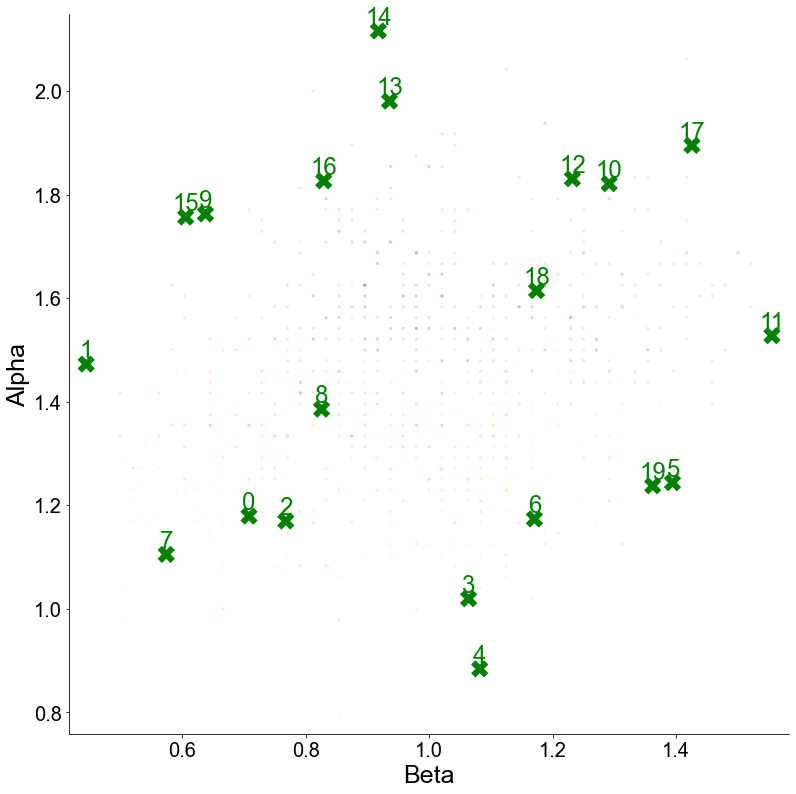

In [36]:
hv.output(clean_subset_responses_ipipNeo60.scatter_plot_cscf(show_profile_centers=True))

In [37]:
responses_ipip60.get_dataframe(responses=True, evaluation=False, cscf=False)

I0  I1  I2  I3  I4  I5  I6  I7  I8  I9  ...  I50  I51  I52  I53  I54  \
0        2   3   5   1   3   2   4   5   1   3  ...    3    5    2    2    4   
1        4   2   4   5   3   3   4   4   2   1  ...    3    4    5    2    2   
2        4   1   3   5   4   4   5   4   1   1  ...    1    5    4    3    5   
3        2   3   3   4   3   4   3   2   2   3  ...    2    2    4    4    2   
4        4   2   4   4   4   4   5   4   4   2  ...    2    2    4    5    4   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...   
720283   3   3   3   1   4   3   2   3   2   2  ...    4    2    3    5    4   
720284   5   1   1   5   5   4   5   3   1   5  ...    1    5    3    1    4   
720285   5   2   3   2   3   3   3   3   3   3  ...    1    4    4    3    5   
720286   4   3   4   4   4   4   4   2   1   2  ...    1    5    4    2    4   
720287   2   2   4   3   5   4   4   5   2   2  ...    4    4    3    3    2   

        I55  I56  I57  I58  I59  
0         1    2    4    2    4  
1         3    3    4    2    4  
2         2    1    5    2    5  
3         4    3    3    3    3  
4         3    3    4    2    4  
...     ...  ...  ...  ...  ...  
720283    4    2    4    4    4  
720284    1    2    1    1    5  
720285    4    4    3    3    4  
720286    2    2    4    2    4  
720287    3    2    3    3    2  

[720288 rows x 60 columns]

### Redundency Personality test
#### IPIP_50


In [38]:
PRIMARY_PERSONALITY_TEST = nc.PERSONALITY_TEST.IPIP_50
implementation_ipip50= tbpt.Ipip50()
profile_centroids = Centroids()

In [39]:
#Load test key and test responses
responses_ipip50 = ptr.PersonalityFactorResponseSet(implementation_ipip50)
loaded_key = responses_ipip50.init_test_key(nc.IPIP_50_TEST_KEY_DIR)

#try:
#    responses_ipip50.load(nc.IPIP_50_QUICKLOAD_DIR, "test_set")
#except ValueError:
#    print("Cannot locate quickload. Loading original file")
df_test_response = pd.read_csv(r"C:\Users\38977332\OneDrive - Southern Methodist University\Documents\School\APF\Repos\apf\LLM_Personality\fall_23\resources\datasets\ipip_50\data-final-commas.csv", delimiter=',', header=0)

df_test_response.dropna(inplace=True)

for col_name in df_test_response.columns:
    if col_name[-1].isdigit(): # Checks the question is answered correctly
        index_incorect_answer = df_test_response[ (df_test_response[col_name] == 0)].index
        df_test_response.drop(index_incorect_answer , inplace=True)
    elif col_name.endswith("_E"): # Checks the question response time
        index_fast_react = df_test_response[ (df_test_response[col_name] <= 1000)].index
        df_test_response.drop(index_fast_react , inplace=True)
    elif col_name == "IPC": # IPC counts the number of times this IP adress was recorded
        index_multiple_responses = df_test_response[ (df_test_response[col_name] != 1)].index
        df_test_response.drop(index_multiple_responses , inplace=True)
        
responses_ipip50.init_raw_responses_pd(df_test_response)
responses_ipip50.eval_test_responses()
responses_ipip50.eval_centroid_similarity(profile_centroids)
responses_ipip50.save(nc.IPIP_50_QUICKLOAD_DIR, "test_set")

Evaluating test responses:


In [40]:
#create dataframe of original data
df_test_responses = responses_ipip50.get_dataframe(responses=True, evaluation=False, cscf=False)

df_test_responses.describe()

I0             I1             I2             I3  \
count  356481.00000  356481.000000  356481.000000  356481.000000   
mean        2.59395       2.825817       3.280453       3.176635   
std         1.23151       1.302602       1.191251       1.200612   
min         1.00000       1.000000       1.000000       1.000000   
25%         1.00000       2.000000       2.000000       2.000000   
50%         3.00000       3.000000       3.000000       3.000000   
75%         3.00000       4.000000       4.000000       4.000000   
max         5.00000       5.000000       5.000000       5.000000   

                  I4             I5             I6             I7  \
count  356481.000000  356481.000000  356481.000000  356481.000000   
mean        3.296826       2.394599       2.747198       3.465127   
std         1.237966       1.201636       1.371452       1.236408   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       1.000000       2.000000       3.000000   
50%         3.000000       2.000000       3.000000       4.000000   
75%         4.000000       3.000000       4.000000       5.000000   
max         5.000000       5.000000       5.000000       5.000000   

                  I8             I9  ...            I40            I41  \
count  356481.000000  356481.000000  ...  356481.000000  356481.000000   
mean        2.940033       3.569124  ...       3.736536       2.028563   
std         1.322548       1.271219  ...       1.082028       1.088611   
min         1.000000       1.000000  ...       1.000000       1.000000   
25%         2.000000       3.000000  ...       3.000000       1.000000   
50%         3.000000       4.000000  ...       4.000000       2.000000   
75%         4.000000       5.000000  ...       5.000000       3.000000   
max         5.000000       5.000000  ...       5.000000       5.000000   

                 I42            I43            I44            I45  \
count  356481.000000  356481.000000  356481.000000  356481.000000   
mean        4.042507       1.958772       3.833172       1.870784   
std         1.031365       1.061589       0.920980       1.072159   
min         1.000000       1.000000       1.000000       1.000000   
25%         3.000000       1.000000       3.000000       1.000000   
50%         4.000000       2.000000       4.000000       2.000000   
75%         5.000000       3.000000       5.000000       2.000000   
max         5.000000       5.000000       5.000000       5.000000   

                 I46            I47            I48            I49  
count  356481.000000  356481.000000  356481.000000  356481.000000  
mean        4.040288       3.210149       4.218991       3.982787  
std         0.922592       1.215917       0.934145       0.980250  
min         1.000000       1.000000       1.000000       1.000000  
25%         4.000000       2.000000       4.000000       3.000000  
50%         4.000000       3.000000       4.000000       4.000000  
75%         5.000000       4.000000       5.000000       5.000000  
max         5.000000       5.000000       5.000000       5.000000  

[8 rows x 50 columns]

In [41]:
#clean data, replace all 0's with 3's
for col_name in df_test_responses.columns:
    df_test_responses[col_name] = df_test_responses[col_name].replace(0,3)

df_test_responses.describe()

I0             I1             I2             I3  \
count  356481.00000  356481.000000  356481.000000  356481.000000   
mean        2.59395       2.825817       3.280453       3.176635   
std         1.23151       1.302602       1.191251       1.200612   
min         1.00000       1.000000       1.000000       1.000000   
25%         1.00000       2.000000       2.000000       2.000000   
50%         3.00000       3.000000       3.000000       3.000000   
75%         3.00000       4.000000       4.000000       4.000000   
max         5.00000       5.000000       5.000000       5.000000   

                  I4             I5             I6             I7  \
count  356481.000000  356481.000000  356481.000000  356481.000000   
mean        3.296826       2.394599       2.747198       3.465127   
std         1.237966       1.201636       1.371452       1.236408   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       1.000000       2.000000       3.000000   
50%         3.000000       2.000000       3.000000       4.000000   
75%         4.000000       3.000000       4.000000       5.000000   
max         5.000000       5.000000       5.000000       5.000000   

                  I8             I9  ...            I40            I41  \
count  356481.000000  356481.000000  ...  356481.000000  356481.000000   
mean        2.940033       3.569124  ...       3.736536       2.028563   
std         1.322548       1.271219  ...       1.082028       1.088611   
min         1.000000       1.000000  ...       1.000000       1.000000   
25%         2.000000       3.000000  ...       3.000000       1.000000   
50%         3.000000       4.000000  ...       4.000000       2.000000   
75%         4.000000       5.000000  ...       5.000000       3.000000   
max         5.000000       5.000000  ...       5.000000       5.000000   

                 I42            I43            I44            I45  \
count  356481.000000  356481.000000  356481.000000  356481.000000   
mean        4.042507       1.958772       3.833172       1.870784   
std         1.031365       1.061589       0.920980       1.072159   
min         1.000000       1.000000       1.000000       1.000000   
25%         3.000000       1.000000       3.000000       1.000000   
50%         4.000000       2.000000       4.000000       2.000000   
75%         5.000000       3.000000       5.000000       2.000000   
max         5.000000       5.000000       5.000000       5.000000   

                 I46            I47            I48            I49  
count  356481.000000  356481.000000  356481.000000  356481.000000  
mean        4.040288       3.210149       4.218991       3.982787  
std         0.922592       1.215917       0.934145       0.980250  
min         1.000000       1.000000       1.000000       1.000000  
25%         4.000000       2.000000       4.000000       3.000000  
50%         4.000000       3.000000       4.000000       4.000000  
75%         5.000000       4.000000       5.000000       5.000000  
max         5.000000       5.000000       5.000000       5.000000  

[8 rows x 50 columns]

In [42]:
clean_responses_ipip50 = ptr.PersonalityFactorResponseSet(implementation_ipip50)
loaded_key = clean_responses_ipip50.init_test_key(nc.IPIP_50_TEST_KEY_DIR)

#try:
#   clean_responses_ipip50.load(nc.IPIP_NEO_120_QUICKLOAD_DIR, "clean_set")
#except ValueError:
#    print("Cannot locate quickload. Loading original file")
clean_responses_ipip50.init_raw_responses_pd(df_test_responses)
clean_responses_ipip50.eval_test_responses()
clean_responses_ipip50.eval_centroid_similarity(profile_centroids)
clean_responses_ipip50.save(nc.IPIP_50_QUICKLOAD_DIR, "clean_set")

Evaluating test responses:


In [43]:
clean_responses_ipip50.get_dataframe(responses=False, evaluation=True, cscf=False).describe()

OPENNESS  CONSCIENTIOUSNESS   EXTRAVERSION  AGREEABLENESS  \
count  356481.000000      356481.000000  356481.000000  356481.000000   
mean        0.730158           0.598359       0.485679       0.698942   
std         0.153507           0.183815       0.226243       0.181364   
min         0.000000           0.000000       0.000000       0.000000   
25%         0.625000           0.475000       0.325000       0.600000   
50%         0.750000           0.600000       0.475000       0.725000   
75%         0.850000           0.725000       0.650000       0.825000   
max         1.000000           1.000000       1.000000       1.000000   

         NEUROTICISM  
count  356481.000000  
mean        0.502184  
std         0.213473  
min         0.000000  
25%         0.350000  
50%         0.500000  
75%         0.650000  
max         1.000000

:Overlay
   .Scatter.I     :Scatter   [Beta]   (Alpha,l0)
   .Scatter.II    :Scatter   [Beta]   (Alpha,Label)
   .Labels.I      :Labels   [Beta,Alpha]   (Label)
   .Scatter.III   :Scatter   [Beta]   (Alpha,Label)
   .Labels.II     :Labels   [Beta,Alpha]   (Label)
   .Scatter.IV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.III    :Labels   [Beta,Alpha]   (Label)
   .Scatter.V     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.V      :Labels   [Beta,Alpha]   (Label)
   .Scatter.VII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.VI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.VII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.IX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.VIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.X     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IX     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.X      :Labels   [Beta,Alpha]   (Label)
   .Scatter.XII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIV   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIV    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVI    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVIII :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIX   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVIII  :Labels   [Beta,Alpha]   (Label)
   .Scatter.XX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIX    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XXI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XX     :Labels   [Beta,Alpha]   (Label)
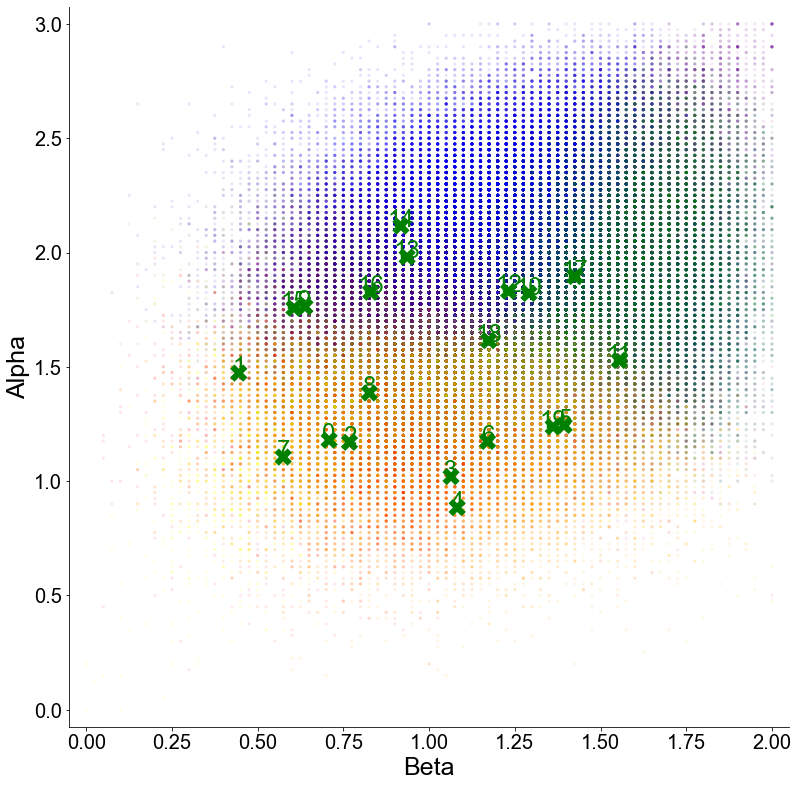

In [44]:
hv.output(clean_responses_ipip50.scatter_plot_cscf(show_profile_centers=True))

In [45]:
clean_responses_ipip50.get_dataframe(responses=False, evaluation=False, cscf=False, labels=clean_responses_ipip50.get_top_k_closest_centroid_list(1)).describe()

l0
count  356481.000000
mean       10.931651
std         4.562171
min         0.000000
25%         8.000000
50%        11.000000
75%        14.000000
max        19.000000

In [46]:
df_subset_responses = clean_responses_ipip50.get_dataframe(responses=True, evaluation=True, cscf=True, labels=clean_responses_ipip50.get_top_k_closest_centroid_list(1))
df_subset_responses.describe()

I0             I1             I2             I3  \
count  356481.00000  356481.000000  356481.000000  356481.000000   
mean        2.59395       2.825817       3.280453       3.176635   
std         1.23151       1.302602       1.191251       1.200612   
min         1.00000       1.000000       1.000000       1.000000   
25%         1.00000       2.000000       2.000000       2.000000   
50%         3.00000       3.000000       3.000000       3.000000   
75%         3.00000       4.000000       4.000000       4.000000   
max         5.00000       5.000000       5.000000       5.000000   

                  I4             I5             I6             I7  \
count  356481.000000  356481.000000  356481.000000  356481.000000   
mean        3.296826       2.394599       2.747198       3.465127   
std         1.237966       1.201636       1.371452       1.236408   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       1.000000       2.000000       3.000000   
50%         3.000000       2.000000       3.000000       4.000000   
75%         4.000000       3.000000       4.000000       5.000000   
max         5.000000       5.000000       5.000000       5.000000   

                  I8             I9  ...            I48            I49  \
count  356481.000000  356481.000000  ...  356481.000000  356481.000000   
mean        2.940033       3.569124  ...       4.218991       3.982787   
std         1.322548       1.271219  ...       0.934145       0.980250   
min         1.000000       1.000000  ...       1.000000       1.000000   
25%         2.000000       3.000000  ...       4.000000       3.000000   
50%         3.000000       4.000000  ...       4.000000       4.000000   
75%         4.000000       5.000000  ...       5.000000       5.000000   
max         5.000000       5.000000  ...       5.000000       5.000000   

            OPENNESS  CONSCIENTIOUSNESS   EXTRAVERSION  AGREEABLENESS  \
count  356481.000000      356481.000000  356481.000000  356481.000000   
mean        0.730158           0.598359       0.485679       0.698942   
std         0.153507           0.183815       0.226243       0.181364   
min         0.000000           0.000000       0.000000       0.000000   
25%         0.625000           0.475000       0.325000       0.600000   
50%         0.750000           0.600000       0.475000       0.725000   
75%         0.850000           0.725000       0.650000       0.825000   
max         1.000000           1.000000       1.000000       1.000000   

         NEUROTICISM          Alpha           Beta             l0  
count  356481.000000  356481.000000  356481.000000  356481.000000  
mean        0.502184       1.795117       1.215837      10.931651  
std         0.213473       0.383413       0.296676       4.562171  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.350000       1.525000       1.000000       8.000000  
50%         0.500000       1.800000       1.225000      11.000000  
75%         0.650000       2.050000       1.425000      14.000000  
max         1.000000       3.000000       2.000000      19.000000  

[8 rows x 58 columns]

In [47]:
N_SAMPLING = 225
df_test_responses_subset = df_subset_responses.groupby('l0', group_keys=False).apply(lambda x: x.sample(N_SAMPLING))
df_test_responses_subset.describe()

I0          I1           I2           I3           I4  \
count  4500.000000  4500.00000  4500.000000  4500.000000  4500.000000   
mean      2.466667     2.98400     3.015778     3.290000     3.059111   
std       1.265403     1.36973     1.269076     1.255577     1.306563   
min       1.000000     1.00000     1.000000     1.000000     1.000000   
25%       1.000000     2.00000     2.000000     2.000000     2.000000   
50%       2.000000     3.00000     3.000000     3.000000     3.000000   
75%       3.000000     4.00000     4.000000     4.000000     4.000000   
max       5.000000     5.00000     5.000000     5.000000     5.000000   

                I5           I6           I7           I8           I9  ...  \
count  4500.000000  4500.000000  4500.000000  4500.000000  4500.000000  ...   
mean      2.582000     2.529333     3.490889     2.911111     3.617556  ...   
std       1.306263     1.398975     1.278390     1.380688     1.321158  ...   
min       1.000000     1.000000     1.000000     1.000000     1.000000  ...   
25%       2.000000     1.000000     3.000000     2.000000     3.000000  ...   
50%       2.000000     2.000000     4.000000     3.000000     4.000000  ...   
75%       4.000000     4.000000     5.000000     4.000000     5.000000  ...   
max       5.000000     5.000000     5.000000     5.000000     5.000000  ...   

               I48          I49     OPENNESS  CONSCIENTIOUSNESS  EXTRAVERSION  \
count  4500.000000  4500.000000  4500.000000        4500.000000   4500.000000   
mean      4.061778     3.816889     0.694806           0.587761      0.450439   
std       1.058715     1.087944     0.174243           0.204976      0.243713   
min       1.000000     1.000000     0.025000           0.000000      0.000000   
25%       4.000000     3.000000     0.575000           0.450000      0.250000   
50%       4.000000     4.000000     0.700000           0.600000      0.450000   
75%       5.000000     5.000000     0.825000           0.750000      0.625000   
max       5.000000     5.000000     1.000000           1.000000      1.000000   

       AGREEABLENESS  NEUROTICISM        Alpha         Beta           l0  
count    4500.000000  4500.000000  4500.000000  4500.000000  4500.000000  
mean        0.567856     0.507206     1.648411     1.145244     9.500000  
std         0.219669     0.230048     0.431948     0.333117     5.766922  
min         0.000000     0.000000     0.350000     0.050000     0.000000  
25%         0.425000     0.325000     1.350000     0.900000     4.750000  
50%         0.575000     0.525000     1.625000     1.150000     9.500000  
75%         0.725000     0.675000     1.925000     1.400000    14.250000  
max         1.000000     1.000000     3.000000     2.000000    19.000000  

[8 rows x 58 columns]

In [48]:
clean_subset_responses_ipip50 = ptr.PersonalityFactorResponseSet(implementation_ipip50)
loaded_key = clean_subset_responses_ipip50.init_test_key(nc.IPIP_50_TEST_KEY_DIR)

#try:
#    clean_subset_responses_ipipNeo300.load(nc.IPIP_NEO_300_QUICKLOAD_DIR, "clean_set")
#except ValueError:
#    print("Cannot locate quickload. Loading original file")
clean_subset_responses_ipip50.init_raw_responses_pd(df_test_responses_subset)
clean_subset_responses_ipip50.eval_test_responses()
clean_subset_responses_ipip50.eval_centroid_similarity(profile_centroids)
clean_subset_responses_ipip50.save(nc.IPIP_NEO_60_QUICKLOAD_DIR, "clean_subset_225")

Evaluating test responses:


In [49]:
clean_responses_ipip50.get_dataframe(responses=False, evaluation=True, cscf=False).describe()

OPENNESS  CONSCIENTIOUSNESS   EXTRAVERSION  AGREEABLENESS  \
count  356481.000000      356481.000000  356481.000000  356481.000000   
mean        0.730158           0.598359       0.485679       0.698942   
std         0.153507           0.183815       0.226243       0.181364   
min         0.000000           0.000000       0.000000       0.000000   
25%         0.625000           0.475000       0.325000       0.600000   
50%         0.750000           0.600000       0.475000       0.725000   
75%         0.850000           0.725000       0.650000       0.825000   
max         1.000000           1.000000       1.000000       1.000000   

         NEUROTICISM  
count  356481.000000  
mean        0.502184  
std         0.213473  
min         0.000000  
25%         0.350000  
50%         0.500000  
75%         0.650000  
max         1.000000

:Overlay
   .Scatter.I     :Scatter   [Beta]   (Alpha,l0)
   .Scatter.II    :Scatter   [Beta]   (Alpha,Label)
   .Labels.I      :Labels   [Beta,Alpha]   (Label)
   .Scatter.III   :Scatter   [Beta]   (Alpha,Label)
   .Labels.II     :Labels   [Beta,Alpha]   (Label)
   .Scatter.IV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.III    :Labels   [Beta,Alpha]   (Label)
   .Scatter.V     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.V      :Labels   [Beta,Alpha]   (Label)
   .Scatter.VII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.VI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.VII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.IX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.VIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.X     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IX     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.X      :Labels   [Beta,Alpha]   (Label)
   .Scatter.XII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIV   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIV    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVI    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVIII :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIX   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVIII  :Labels   [Beta,Alpha]   (Label)
   .Scatter.XX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIX    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XXI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XX     :Labels   [Beta,Alpha]   (Label)
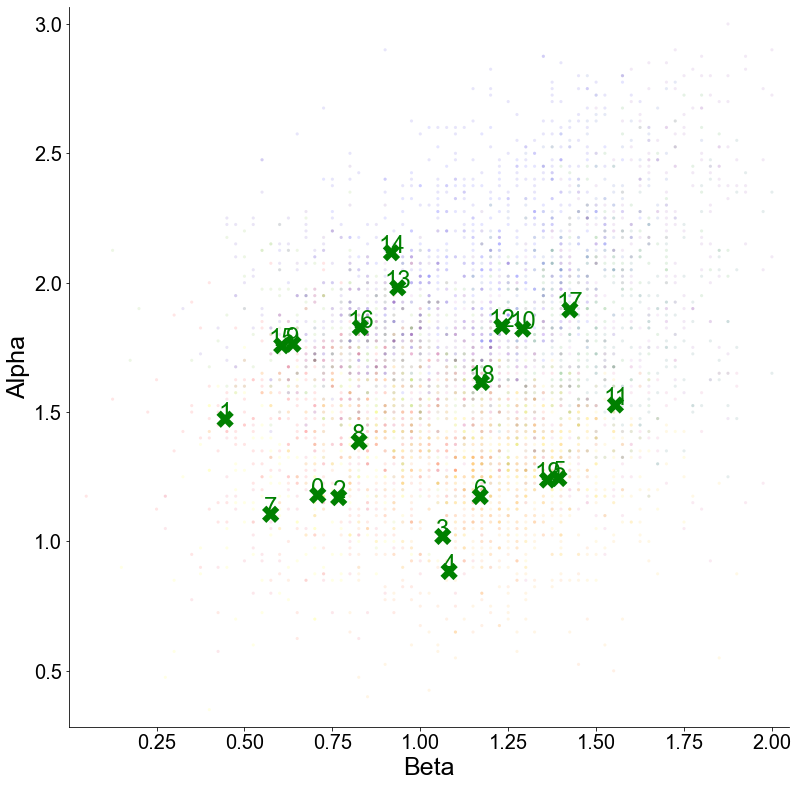

In [50]:
hv.output(clean_subset_responses_ipip50.scatter_plot_cscf(show_profile_centers=True))

### External Criteria

#### PANAS_20

In [51]:
PRIMARY_PERSONALITY_TEST = nc.PERSONALITY_TEST.PANAS_20
implementation_panas20 = tbpt.Panas20()
profile_centroids = Centroids()

#Load test key and test responses
responses_panas20 = ptr.PersonalityFactorResponseSet(implementation_panas20)
loaded_key = responses_panas20.init_test_key(nc.PANAS_20_TEST_KEY_DIR)

try:
    responses_panas20.load(nc.PANAS_20_QUICKLOAD_DIR, "clean_set")
    responses_panas20.eval_test_responses()
    responses_panas20.save(nc.PANAS_20_QUICKLOAD_DIR, "clean_set")
except ValueError:
    print("Cannot locate quickload. Loading original file")
    responses_panas20.init_raw_responses_dir(nc.PANAS_20_TEST_RESPONSES_DIR)
    responses_panas20.eval_test_responses()
    responses_panas20.save(nc.PANAS_20_QUICKLOAD_DIR, "clean_set")

#create dataframe of original data
df_test_responses = responses_panas20.get_dataframe(responses=True, evaluation=True, cscf=False)
df_test_responses.describe()

Evaluating test responses:


I0            I1            I2            I3            I4  \
count  10001.000000  10001.000000  10001.000000  10001.000000  10001.000000   
mean       2.991201      3.013399      2.994001      3.007199      2.981802   
std        1.219394      1.222301      1.232463      1.218092      1.226486   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      2.000000      2.000000      2.000000      2.000000   
50%        3.000000      3.000000      3.000000      3.000000      3.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

                 I5            I6            I7            I8            I9  \
count  10001.000000  10001.000000  10001.000000  10001.000000  10001.000000   
mean       2.989801      3.016598      3.001200      2.996400      3.020798   
std        1.219711      1.229359      1.220655      1.223187      1.219085   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      2.000000      2.000000      2.000000      2.000000   
50%        3.000000      3.000000      3.000000      3.000000      3.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

       ...           I12           I13           I14           I15  \
count  ...  10001.000000  10001.000000  10001.000000  10001.000000   
mean   ...      2.990901      3.014299      3.003000      2.997100   
std    ...      1.235321      1.234057      1.226373      1.219628   
min    ...      1.000000      1.000000      1.000000      1.000000   
25%    ...      2.000000      2.000000      2.000000      2.000000   
50%    ...      3.000000      3.000000      3.000000      3.000000   
75%    ...      4.000000      4.000000      4.000000      4.000000   
max    ...      5.000000      5.000000      5.000000      5.000000   

                I16           I17           I18           I19      POSITIVE  \
count  10001.000000  10001.000000  10001.000000  10001.000000  10001.000000   
mean       2.986601      2.988301      2.977802      2.999200      0.499108   
std        1.216807      1.234165      1.225850      1.219672      0.096295   
min        1.000000      1.000000      1.000000      1.000000      0.150000   
25%        2.000000      2.000000      2.000000      2.000000      0.425000   
50%        3.000000      3.000000      3.000000      3.000000      0.500000   
75%        4.000000      4.000000      4.000000      4.000000      0.575000   
max        5.000000      5.000000      5.000000      5.000000      0.825000   

          NEGATIVE  
count  10001.00000  
mean       0.50017  
std        0.09665  
min        0.15000  
25%        0.42500  
50%        0.50000  
75%        0.57500  
max        0.87500  

[8 rows x 22 columns]

#### BPAQ_29

In [52]:
PRIMARY_PERSONALITY_TEST = nc.PERSONALITY_TEST.BPAQ_29
implementation_bpaq29 = tbpt.Bpaq29()
profile_centroids = Centroids()

#Load test key and test responses
responses_bpaq29 = ptr.PersonalityFactorResponseSet(implementation_bpaq29)
loaded_key = responses_bpaq29.init_test_key(nc.BPAQ_29_TEST_KEY_DIR)

try:
    responses_bpaq29.load(nc.BPAQ_29_QUICKLOAD_DIR, "clean_set")
    responses_bpaq29.eval_test_responses()
    responses_bpaq29.save(nc.BPAQ_29_QUICKLOAD_DIR, "clean_set")
except ValueError:
    print("Cannot locate quickload. Loading original file")
    responses_bpaq29.init_raw_responses_dir(nc.BPAQ_29_TEST_RESPONSES_DIR)
    responses_bpaq29.eval_test_responses()
    responses_bpaq29.save(nc.BPAQ_29_QUICKLOAD_DIR, "clean_set")

#create dataframe of original data
df_test_responses = responses_bpaq29.get_dataframe(responses=True, evaluation=True, cscf=False)
df_test_responses.describe()

Evaluating test responses:


I0            I1            I2            I3            I4  \
count  10001.000000  10001.000000  10001.000000  10001.000000  10001.000000   
mean       3.002600      2.991801      2.990601      2.987201      3.008099   
std        1.229631      1.222102      1.216927      1.226147      1.227695   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      2.000000      2.000000      2.000000      2.000000   
50%        3.000000      3.000000      3.000000      3.000000      3.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

                 I5            I6            I7            I8            I9  \
count  10001.000000  10001.000000  10001.000000  10001.000000  10001.000000   
mean       3.000800      2.999500      3.010199      3.005399      3.027197   
std        1.233612      1.218565      1.231136      1.217034      1.222645   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      2.000000      2.000000      2.000000      2.000000   
50%        3.000000      3.000000      3.000000      3.000000      3.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

       ...           I23          I24           I25           I26  \
count  ...  10001.000000  10001.00000  10001.000000  10001.000000   
mean   ...      3.011099      2.99890      3.018298      3.022898   
std    ...      1.222447      1.23065      1.217360      1.231574   
min    ...      1.000000      1.00000      1.000000      1.000000   
25%    ...      2.000000      2.00000      2.000000      2.000000   
50%    ...      3.000000      3.00000      3.000000      3.000000   
75%    ...      4.000000      4.00000      4.000000      4.000000   
max    ...      5.000000      5.00000      5.000000      5.000000   

                I27           I28      PHYSICAL        VERBAL         ANGER  \
count  10001.000000  10001.000000  10001.000000  10001.000000  10001.000000   
mean       3.010599      2.979502      0.646401      0.266148      0.440277   
std        1.228856      1.224369      0.126165      0.094112      0.112991   
min        1.000000      1.000000      0.163793      0.000000      0.000000   
25%        2.000000      2.000000      0.577586      0.198276      0.370690   
50%        3.000000      3.000000      0.646552      0.267241      0.439655   
75%        4.000000      4.000000      0.715517      0.336207      0.508621   
max        5.000000      5.000000      1.000000      0.577586      0.818966   

          HOSTILITY  
count  10001.000000  
mean       0.578507  
std        0.119063  
min        0.163793  
25%        0.508621  
50%        0.577586  
75%        0.646552  
max        0.956897  

[8 rows x 33 columns]

#### SSCS_11

In [53]:
PRIMARY_PERSONALITY_TEST = nc.PERSONALITY_TEST.SSCS_11
implementation_sscs11 = tbpt.Sscs11()
profile_centroids = Centroids()

#Load test key and test responses
responses_sscs11 = ptr.PersonalityFactorResponseSet(implementation_sscs11)
loaded_key = responses_sscs11.init_test_key(nc.SSCS_11_TEST_KEY_DIR)

try:
    responses_sscs11.load(nc.SSCS_11_QUICKLOAD_DIR, "clean_set")
    responses_sscs11.eval_test_responses()
    responses_sscs11.save(nc.SSCS_11_QUICKLOAD_DIR, "clean_set")
except ValueError:
    print("Cannot locate quickload. Loading original file")
    responses_sscs11.init_raw_responses_dir(nc.SSCS_11_TEST_RESPONSES_DIR)
    responses_sscs11.eval_test_responses()
    responses_sscs11.save(nc.SSCS_11_QUICKLOAD_DIR, "clean_set")

#create dataframe of original data
df_test_responses = responses_sscs11.get_dataframe(responses=True, evaluation=True, cscf=False)
df_test_responses.describe()    

Evaluating test responses:


I0            I1            I2            I3            I4  \
count  10001.000000  10001.000000  10001.000000  10001.000000  10001.000000   
mean       2.992601      2.975302      2.995500      2.996200      3.012799   
std        1.225539      1.211565      1.216914      1.227919      1.218210   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      2.000000      2.000000      2.000000      2.000000   
50%        3.000000      3.000000      3.000000      3.000000      3.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

                 I5            I6            I7            I8            I9  \
count  10001.000000  10001.000000  10001.000000  10001.000000  10001.000000   
mean       3.013399      2.992901      2.989401      3.012099      3.004300   
std        1.239444      1.225745      1.234134      1.229859      1.214612   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      2.000000      2.000000      2.000000      2.000000   
50%        3.000000      3.000000      3.000000      3.000000      3.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

                I10  SELF_EFFICACY  PERSONAL_IDENTITY  
count  10001.000000   10001.000000       10001.000000  
mean       2.997400       0.569059           0.430114  
std        1.221062       0.136622           0.124513  
min        1.000000       0.113636           0.022727  
25%        2.000000       0.477273           0.340909  
50%        3.000000       0.568182           0.431818  
75%        4.000000       0.659091           0.522727  
max        5.000000       1.000000           0.886364

#### PVQ_RR_57 

In [54]:
PRIMARY_PERSONALITY_TEST = nc.PERSONALITY_TEST.PVQ_RR_57
implementation_pvqrr57 = tbpt.Pvqrr57()
profile_centroids = Centroids()

#Load test key and test responses
responses_pvqrr57 = ptr.PersonalityFactorResponseSet(implementation_pvqrr57)
loaded_key = responses_pvqrr57.init_test_key(nc.PVQRR_57_TEST_KEY_DIR)

try:
    responses_pvqrr57.load(nc.PVQRR_57_QUICKLOAD_DIR, "clean_set")
    responses_pvqrr57.eval_test_responses()
    responses_pvqrr57.save(nc.PVQRR_57_QUICKLOAD_DIR, "clean_set")
except ValueError:
    print("Cannot locate quickload. Loading original file")
    responses_pvqrr57.init_raw_responses_dir(nc.PVQRR_57_TEST_RESPONSES_DIR)
    responses_pvqrr57.eval_test_responses()
    responses_pvqrr57.save(nc.PVQRR_57_QUICKLOAD_DIR, "clean_set")

#create dataframe of original data
df_test_responses = responses_pvqrr57.get_dataframe(responses=True, evaluation=True, cscf=False)
df_test_responses.describe()

Evaluating test responses:


I0            I1            I2            I3            I4  \
count  10001.000000  10001.000000  10001.000000  10001.000000  10001.000000   
mean       3.485451      3.503350      3.501350      3.502050      3.508449   
std        1.497803      1.502403      1.506859      1.503603      1.489347   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      2.000000      2.000000      2.000000      2.000000   
50%        3.000000      4.000000      3.000000      4.000000      4.000000   
75%        5.000000      5.000000      5.000000      5.000000      5.000000   
max        6.000000      6.000000      6.000000      6.000000      6.000000   

                 I5            I6            I7            I8            I9  \
count  10001.000000  10001.000000  10001.000000  10001.000000  10001.000000   
mean       3.487551      3.525647      3.487151      3.531847      3.499150   
std        1.509394      1.495583      1.501086      1.504663      1.508318   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      2.000000      2.000000      2.000000      2.000000   
50%        3.000000      4.000000      3.000000      4.000000      4.000000   
75%        5.000000      5.000000      5.000000      5.000000      5.000000   
max        6.000000      6.000000      6.000000      6.000000      6.000000   

       ...  SELF_DIRECTION      SECURITY   STIMULATION    CONFORMITY  \
count  ...    10001.000000  10001.000000  10001.000000  10001.000000   
mean   ...        0.518093      0.516013      0.137122      0.517036   
std    ...        0.132577      0.132820      0.089861      0.134742   
min    ...        0.042398      0.005848      0.000000      0.078947   
25%    ...        0.444444      0.407895      0.078947      0.407895   
50%    ...        0.517544      0.517544      0.152047      0.517544   
75%    ...        0.627193      0.590643      0.188596      0.627193   
max    ...        1.000000      0.956140      0.407895      0.956140   

           HEDONISM     TRADITION   ACHIEVEMENT   BENEVOLENCE         POWER  \
count  10001.000000  10001.000000  10001.000000  10001.000000  10001.000000   
mean       0.136196      0.515581      0.138001      0.518794      0.518019   
std        0.089151      0.133230      0.088502      0.132000      0.134034   
min        0.000000      0.078947      0.000000      0.078947      0.078947   
25%        0.078947      0.407895      0.078947      0.444444      0.407895   
50%        0.115497      0.517544      0.152047      0.517544      0.517544   
75%        0.188596      0.590643      0.188596      0.590643      0.627193   
max        0.407895      0.992690      0.407895      1.000000      0.992690   

       UNIVERSALISM  
count  10001.000000  
mean       0.994564  
std        0.027367  
min        0.554094  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 67 columns]

### Generate Synthetic Data

In [ ]:
PRIMARY_PERSONALITY_TEST = nc.PERSONALITY_TEST.IPIP_50
implementation_ipip50 = tbpt.Ipip50()
profile_centroids = Centroids()

# Load test key and test responses
responses_ipip50 = ptr.PersonalityFactorResponseSet(implementation_ipip50)
loaded_key = responses_ipip50.init_test_key(nc.IPIP_50_TEST_KEY_DIR)

try:
    responses_ipip50.load(nc.IPIP_50_QUICKLOAD_DIR, "test_set")
except ValueError:
    print("Cannot locate quickload. Loading original file")
    df_test_response = pd.read_csv(
        r"C:\Users\38977332\OneDrive - Southern Methodist University\Documents\School\APF\Repos\apf\LLM_Personality\fall_23\resources\datasets\ipip_50\data-final-commas.csv",
        delimiter=',', header=0)

    df_test_response.dropna(inplace=True)

    for col_name in df_test_response.columns:
        if col_name[-1].isdigit():  # Checks the question is answered correctly
            index_incorect_answer = df_test_response[(df_test_response[col_name] == 0)].index
            df_test_response.drop(index_incorect_answer, inplace=True)
        elif col_name.endswith("_E"):  # Checks the question response time
            index_fast_react = df_test_response[(df_test_response[col_name] <= 1000)].index
            df_test_response.drop(index_fast_react, inplace=True)
        elif col_name == "IPC":  # IPC counts the number of times this IP adress was recorded
            index_multiple_responses = df_test_response[(df_test_response[col_name] != 1)].index
            df_test_response.drop(index_multiple_responses, inplace=True)

    responses_ipip50.init_raw_responses_pd(df_test_response)
    responses_ipip50.eval_test_responses()
    responses_ipip50.eval_centroid_similarity(profile_centroids)
    responses_ipip50.save(nc.IPIP_50_QUICKLOAD_DIR, "test_set")

multiples = 1
population_orca_2 = SP.SyntheticPopulation()
population_orca_2.SetPopulationPrompts(personality_profile_centers=profile_centroids.GetCenterList(), replicas=multiples, question_items=responses_ipip50.get_item_list())

response_index = population_orca_2.GetListOfIndexPairs()
random.shuffle(response_index)

input_text = []
for r_idx in response_index:
    input_text.append(population_orca_2.GetPrompt(r_idx[0], r_idx[1]))

num_questions_per_batch = 10

all_text_input = [input_text[i:i+num_questions_per_batch] for i in range(0, len(input_text), num_questions_per_batch)]

llm_implementation = LCI.LC_GPT4All()
llm_model = LCL.OPENAI_GPT_3_5(llm_implementation)

llm_model.template = "{question}"
llm_model.prompt = ['question']

batch_idx = 0
response_idx = 0

entire_process_start_time = time.time()
batch_delta_times = np.zeros(len(all_text_input))
for batch_input in all_text_input:
    batch_start_time = time.time()
    print(f"Batch: {batch_idx} out of {len(all_text_input)}")
    print(f"{batch_input}")

    # Either we for loop each prompt and ask the LLM one at a time
    for input in batch_input:
        print(f"input: {input}")
        generated_output = llm_model.run(input)
        generated_output = generated_output.lower()
        print(f"generated output: {generated_output}")

        found_1 = generated_output.find('very inaccurate')
        found_2 = generated_output.find('moderately inaccurate')
        found_3 = generated_output.find('neither accurate nor inaccurate')
        found_4 = generated_output.find('moderately accurate')
        found_5 = generated_output.find('very accurate')

        found_result = 0
        if found_1 != -1:
            found_result = 1
        elif found_2 != -1:
            found_result = 2
        elif found_3 != -1:
            found_result = 3
        elif found_4 != -1:
            found_result = 4
        elif found_5 != -1:
            found_result = 5

        population_orca_2.SaveResponse(response_index[response_idx][0], response_index[response_idx][1], found_result)
        response_idx += 1


    batch_end_time = time.time()
    delta_time = batch_end_time - batch_start_time
    batch_delta_times[batch_idx] = delta_time
    print(f"Batch: {batch_idx} finished in {delta_time}, avg batch time {np.sum(batch_delta_times)/(batch_idx + 1)}")
    batch_idx += 1
print(f"Total Batch time: {(time.time() - entire_process_start_time)} seconds ---")

print(population_orca_2.GetResponseDf())
synthetic_responses_ipip50 = ptr.PersonalityFactorResponseSet(implementation_ipip50)
loaded_key = synthetic_responses_ipip50.init_test_key(nc.IPIP_50_TEST_KEY_DIR)
synthetic_responses_ipip50.init_raw_responses_pd(population_orca_2.GetResponseDf())
synthetic_responses_ipip50.eval_test_responses()
synthetic_responses_ipip50.eval_centroid_similarity(profile_centroids)
synthetic_responses_ipip50.save(nc.IPIP_50_QUICKLOAD_DIR, "population_gpt_3_5")

In [ ]:
#Load test key and test responses
synthetic_responses_ipip50 = ptr.PersonalityFactorResponseSet(implementation_ipip50)
loaded_key = responses_ipipNeo300.init_test_key(nc.IPIP_NEO_300_TEST_KEY_DIR)

try:
    synthetic_responses_ipip50.load(nc.IPIP_50_QUICKLOAD_DIR, "population_gpt_3_5")
except ValueError:
    print("Cannot locate quickload. Loading original file")
    synthetic_responses_ipip50.init_raw_responses_dir(nc.IPIP_50_TEST_RESPONSES_DIR)
    synthetic_responses_ipip50.eval_test_responses()
    synthetic_responses_ipip50.eval_centroid_similarity(profile_centroids)
    synthetic_responses_ipip50.save(nc.IPIP_50_QUICKLOAD_DIR, "population_gpt_3_5")

In [ ]:
'''
PRIMARY_PERSONALITY_TEST = nc.PERSONALITY_TEST.IPIP_50
implementation_ipip50= tbpt.Ipip50()
profile_centroids = Centroids()
responses_ipip50 = ptr.PersonalityFactorResponseSet(implementation_ipip50)
loaded_key = responses_ipip50.init_test_key(nc.IPIP_50_TEST_KEY_DIR)
responses_ipip50.load(nc.IPIP_50_QUICKLOAD_DIR, "test_population_flan_xl")
responses_ipip50.eval_test_responses()
responses_ipip50.eval_centroid_similarity(profile_centroids)
hv.output(responses_ipip50.scatter_plot_cscf(show_profile_centers=True))
'''

### GPT Synthetic Population

In [55]:
PRIMARY_PERSONALITY_TEST = nc.PERSONALITY_TEST.IPIP_NEO_300
implementation_ipipNeo300 = tbpt.IpipNeo300()
profile_centroids = Centroids()

#Load test key and test responses
gpt_3_5_ipipNeo300 = ptr.PersonalityFactorResponseSet(implementation_ipipNeo300)
loaded_key = gpt_3_5_ipipNeo300.init_test_key(nc.IPIP_NEO_300_TEST_KEY_DIR)

try:
    gpt_3_5_ipipNeo300.load(nc.IPIP_NEO_300_QUICKLOAD_DIR, "population_gpt_3_5")
except ValueError:
    print("Cannot locate quickload. Loading original file")
    gpt_3_5_ipipNeo300.init_raw_responses_dir(nc.IPIP_NEO_300_TEST_RESPONSES_DIR)
    gpt_3_5_ipipNeo300.eval_test_responses()
    
    gpt_3_5_ipipNeo300.save(nc.IPIP_NEO_300_QUICKLOAD_DIR, "population_gpt_3_5")
    
df_test_responses = gpt_3_5_ipipNeo300.get_dataframe(responses=True, evaluation=False, cscf=False)

#clean data, replace all 0's with 3's
for col_name in df_test_responses.columns:
    df_test_responses[col_name] = df_test_responses[col_name].replace(0,3)

clean_gpt_3_5_ipipNeo300 = ptr.PersonalityFactorResponseSet(implementation_ipipNeo300)
loaded_key = clean_gpt_3_5_ipipNeo300.init_test_key(nc.IPIP_NEO_300_TEST_KEY_DIR)

#try:
#    clean_gpt_3_5_ipipeo300.load(nc.IPIP_NEO_300_QUICKLOAD_DIR, "clean_set")
#except ValueError:
#    print("Cannot locate quickload. Loading original file")
clean_gpt_3_5_ipipNeo300.init_raw_responses_pd(df_test_responses)
clean_gpt_3_5_ipipNeo300.eval_test_responses()
clean_gpt_3_5_ipipNeo300.eval_centroid_similarity(profile_centroids)
clean_gpt_3_5_ipipNeo300.save(nc.IPIP_NEO_300_QUICKLOAD_DIR, "population_gpt_3_5_clean")

hv.output(clean_gpt_3_5_ipipNeo300.scatter_plot_cscf(show_profile_centers=True))

Evaluating test responses:


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\38977332\\OneDrive - Southern Methodist University\\Documents\\School\\APF\\Repos\\apf\\LLM_Personality\\fall_23\\scripts\\..\\notebooks\\results\\PersonalityTest.IPIP_NEO_300\\population_gpt_3_5_clean\\test_responses.npy'

Evaluating test responses:


:Overlay
   .Scatter.I     :Scatter   [Beta]   (Alpha,l0)
   .Scatter.II    :Scatter   [Beta]   (Alpha,Label)
   .Labels.I      :Labels   [Beta,Alpha]   (Label)
   .Scatter.III   :Scatter   [Beta]   (Alpha,Label)
   .Labels.II     :Labels   [Beta,Alpha]   (Label)
   .Scatter.IV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.III    :Labels   [Beta,Alpha]   (Label)
   .Scatter.V     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.V      :Labels   [Beta,Alpha]   (Label)
   .Scatter.VII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.VI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.VII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.IX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.VIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.X     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IX     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.X      :Labels   [Beta,Alpha]   (Label)
   .Scatter.XII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIV   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIV    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVI    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVIII :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIX   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVIII  :Labels   [Beta,Alpha]   (Label)
   .Scatter.XX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIX    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XXI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XX     :Labels   [Beta,Alpha]   (Label)
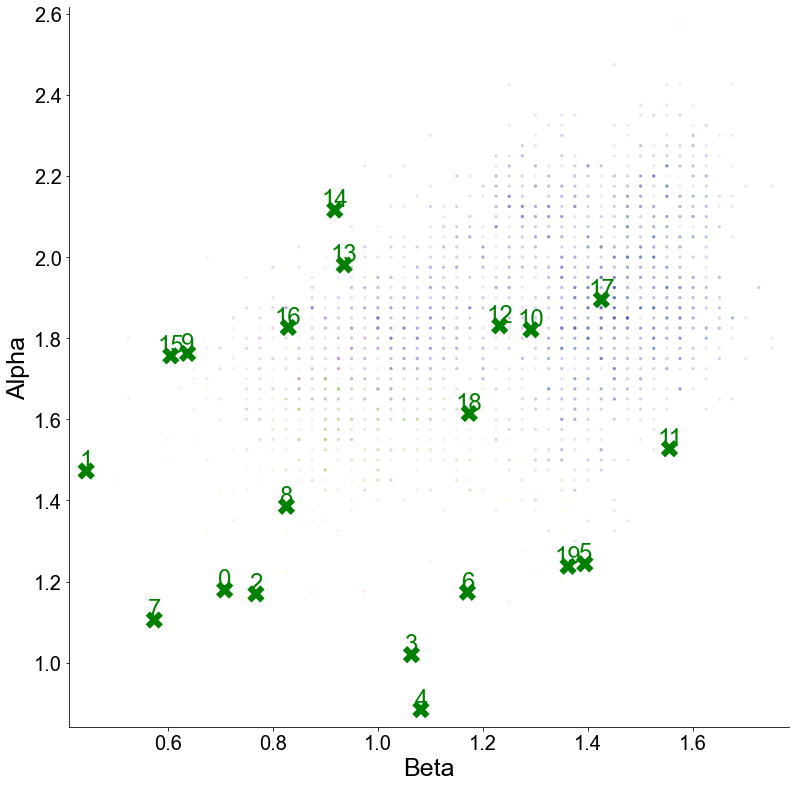

In [61]:
PRIMARY_PERSONALITY_TEST = nc.PERSONALITY_TEST.IPIP_50
implementation_ipip50 = tbpt.Ipip50()
profile_centroids = Centroids()

#Load test key and test responses
gpt_3_5_ipip50 = ptr.PersonalityFactorResponseSet(implementation_ipip50)
loaded_key = gpt_3_5_ipip50.init_test_key(nc.IPIP_50_TEST_KEY_DIR)

try:
    gpt_3_5_ipip50.load(nc.IPIP_50_QUICKLOAD_DIR, "population_gpt_3_5")
except ValueError:
    print("Cannot locate quickload. Loading original file")
    gpt_3_5_ipip50.init_raw_responses_dir(nc.IPIP_50_TEST_RESPONSES_DIR)
    gpt_3_5_ipip50.eval_test_responses()
    
    gpt_3_5_ipip50.save(nc.IPIP_50_QUICKLOAD_DIR, "population_gpt_3_5")
    
df_test_responses = gpt_3_5_ipip50.get_dataframe(responses=True, evaluation=False, cscf=False)

#clean data, replace all 0's with 3's
for col_name in df_test_responses.columns:
    df_test_responses[col_name] = df_test_responses[col_name].replace(0,3)

clean_gpt_3_5_ipip50 = ptr.PersonalityFactorResponseSet(implementation_ipip50)
loaded_key = clean_gpt_3_5_ipip50.init_test_key(nc.IPIP_50_TEST_KEY_DIR)

#try:
#    clean_gpt_3_5_ipipeo300.load(nc.IPIP_50_QUICKLOAD_DIR, "clean_set")
#except ValueError:
#    print("Cannot locate quickload. Loading original file")
clean_gpt_3_5_ipip50.init_raw_responses_pd(df_test_responses)
clean_gpt_3_5_ipip50.eval_test_responses()
clean_gpt_3_5_ipip50.eval_centroid_similarity(profile_centroids)
clean_gpt_3_5_ipip50.save(nc.IPIP_50_QUICKLOAD_DIR, "population_gpt_3_5_clean")

hv.output(clean_gpt_3_5_ipip50.scatter_plot_cscf(show_profile_centers=True))

### AWS Synthetic Population

Evaluating test responses:


:Overlay
   .Scatter.I     :Scatter   [Beta]   (Alpha,l0)
   .Scatter.II    :Scatter   [Beta]   (Alpha,Label)
   .Labels.I      :Labels   [Beta,Alpha]   (Label)
   .Scatter.III   :Scatter   [Beta]   (Alpha,Label)
   .Labels.II     :Labels   [Beta,Alpha]   (Label)
   .Scatter.IV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.III    :Labels   [Beta,Alpha]   (Label)
   .Scatter.V     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.V      :Labels   [Beta,Alpha]   (Label)
   .Scatter.VII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.VI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.VIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.VII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.IX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.VIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.X     :Scatter   [Beta]   (Alpha,Label)
   .Labels.IX     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XI    :Scatter   [Beta]   (Alpha,Label)
   .Labels.X      :Labels   [Beta,Alpha]   (Label)
   .Scatter.XII   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XI     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XII    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIV   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XV    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIV    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XV     :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVII  :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVI    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XVIII :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVII   :Labels   [Beta,Alpha]   (Label)
   .Scatter.XIX   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XVIII  :Labels   [Beta,Alpha]   (Label)
   .Scatter.XX    :Scatter   [Beta]   (Alpha,Label)
   .Labels.XIX    :Labels   [Beta,Alpha]   (Label)
   .Scatter.XXI   :Scatter   [Beta]   (Alpha,Label)
   .Labels.XX     :Labels   [Beta,Alpha]   (Label)
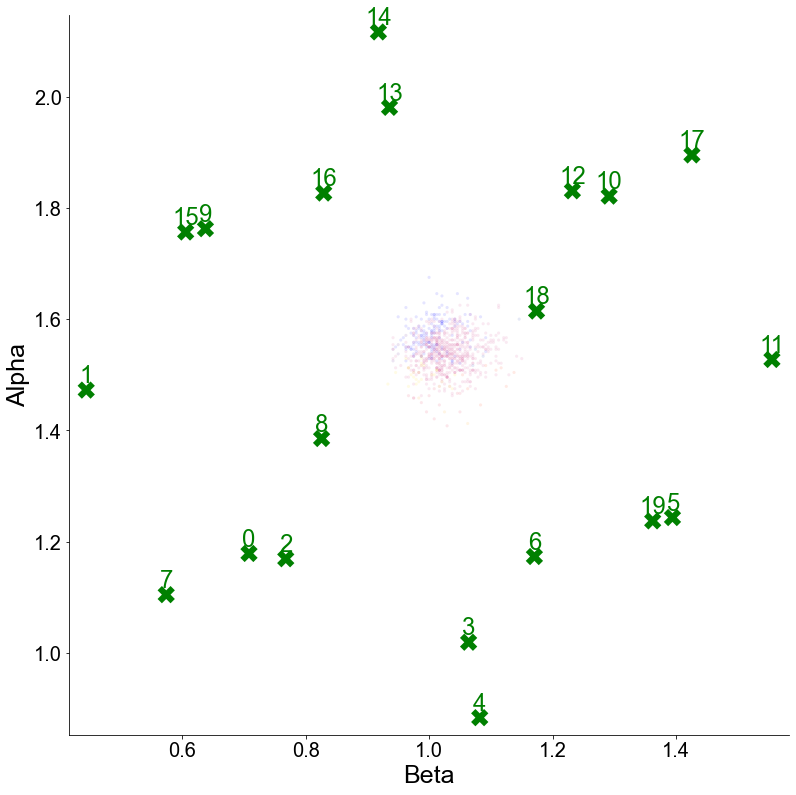

In [58]:
PRIMARY_PERSONALITY_TEST = nc.PERSONALITY_TEST.IPIP_NEO_300
implementation_ipipNeo300 = tbpt.IpipNeo300()
profile_centroids = Centroids()

#Load test key and test responses
aws_claud_ipipNeo300 = ptr.PersonalityFactorResponseSet(implementation_ipipNeo300)
loaded_key = aws_claud_ipipNeo300.init_test_key(nc.IPIP_NEO_300_TEST_KEY_DIR)

try:
    aws_claud_ipipNeo300.load(nc.IPIP_NEO_300_QUICKLOAD_DIR, "population_aws_claude")
except ValueError:
    print("Cannot locate quickload. Loading original file")
    aws_claud_ipipNeo300.init_raw_responses_dir(nc.IPIP_NEO_300_TEST_RESPONSES_DIR)
    aws_claud_ipipNeo300.eval_test_responses()
    
    aws_claud_ipipNeo300.save(nc.IPIP_NEO_300_QUICKLOAD_DIR, "population_aws_claude")
    
df_test_responses = aws_claud_ipipNeo300.get_dataframe(responses=True, evaluation=False, cscf=False)

#clean data, replace all 0's with 3's
for col_name in df_test_responses.columns:
    df_test_responses[col_name] = df_test_responses[col_name].replace(0,3)

clean_aws_claud_ipipNeo300 = ptr.PersonalityFactorResponseSet(implementation_ipipNeo300)
loaded_key = clean_aws_claud_ipipNeo300.init_test_key(nc.IPIP_NEO_300_TEST_KEY_DIR)

#try:
#    clean_aws_claud_ipipNeo300.load(nc.IPIP_NEO_300_QUICKLOAD_DIR, "clean_set")
#except ValueError:
#    print("Cannot locate quickload. Loading original file")
clean_aws_claud_ipipNeo300.init_raw_responses_pd(df_test_responses)
clean_aws_claud_ipipNeo300.eval_test_responses()
clean_aws_claud_ipipNeo300.eval_centroid_similarity(profile_centroids)
clean_aws_claud_ipipNeo300.save(nc.IPIP_NEO_300_QUICKLOAD_DIR, "population_aws_claude")

hv.output(clean_aws_claud_ipipNeo300.scatter_plot_cscf(show_profile_centers=True))

In [ ]:
PRIMARY_PERSONALITY_TEST = nc.PERSONALITY_TEST.IPIP_50
implementation_ipip50 = tbpt.ipip50()
profile_centroids = Centroids()

#Load test key and test responses
aws_cladue_ipip50 = ptr.PersonalityFactorResponseSet(implementation_ipip50)
loaded_key = aws_cladue_ipip50.init_test_key(nc.IPIP_50_TEST_KEY_DIR)

try:
    aws_cladue_ipip50.load(nc.IPIP_50_QUICKLOAD_DIR, "population_aws_cladue")
except ValueError:
    print("Cannot locate quickload. Loading original file")
    aws_cladue_ipip50.init_raw_responses_dir(nc.IPIP_50_TEST_RESPONSES_DIR)
    aws_cladue_ipip50.eval_test_responses()
    
    aws_cladue_ipip50.save(nc.IPIP_50_QUICKLOAD_DIR, "population_aws_cladue")
    
df_test_responses = aws_cladue_ipip50.get_dataframe(responses=True, evaluation=False, cscf=False)

#clean data, replace all 0's with 3's
for col_name in df_test_responses.columns:
    df_test_responses[col_name] = df_test_responses[col_name].replace(0,3)

clean_aws_cladue_ipip50 = ptr.PersonalityFactorResponseSet(implementation_ipip50)
loaded_key = clean_aws_cladue_ipip50.init_test_key(nc.IPIP_50_TEST_KEY_DIR)

#try:
#    clean_aws_cladue_ipipeo300.load(nc.IPIP_50_QUICKLOAD_DIR, "clean_set")
#except ValueError:
#    print("Cannot locate quickload. Loading original file")
clean_aws_cladue_ipip50.init_raw_responses_pd(df_test_responses)
clean_aws_cladue_ipip50.eval_test_responses()
clean_aws_cladue_ipip50.eval_centroid_similarity(profile_centroids)
clean_aws_cladue_ipip50.save(nc.IPIP_50_QUICKLOAD_DIR, "population_aws_cladue_clean")

hv.output(clean_aws_cladue_ipip50.scatter_plot_cscf(show_profile_centers=True))

## Reviewing Attempts

In [ ]:
PRIMARY_PERSONALITY_TEST = nc.PERSONALITY_TEST.IPIP_NEO_300
implementation_ipipNeo300 = tbpt.IpipNeo300()
profile_centroids = Centroids()

#Load test key and test responses
attempted_ipipNeo300 = ptr.PersonalityFactorResponseSet(implementation_ipipNeo300)
loaded_key = attempted_ipipNeo300.init_test_key(nc.IPIP_NEO_300_TEST_KEY_DIR)

attempted_ipipNeo300.load(nc.IPIP_NEO_300_QUICKLOAD_DIR, f"population_aws_claud")
    
df_test_responses = attempted_ipipNeo300.get_dataframe(responses=True, evaluation=False, cscf=False)
df_test_responses.to_csv(path_or_buf="C:\\Users\\38977332\\OneDrive - Southern Methodist University\\Documents\\School\\APF\\Repos\\apf\\LLM_Personality\\fall_23\\notebooks\\results\\PersonalityTest.IPIP_NEO_300\\Attempts\\population_aws_claud\\3\\test_responses.csv")

df_test_responses

In [ ]:
import copy

attempt_responses_1 = pd.read_csv("C:\\Users\\38977332\\OneDrive - Southern Methodist University\\Documents\\School\\APF\\Repos\\apf\\LLM_Personality\\fall_23\\notebooks\\results\\PersonalityTest.IPIP_NEO_300\\Attempts\\population_aws_claud\\3\\test_responses.csv")

original_responses = pd.read_csv("C:\\Users\\38977332\\OneDrive - Southern Methodist University\\Documents\\School\\APF\\Repos\\apf\\LLM_Personality\\fall_23\\notebooks\\results\\PersonalityTest.IPIP_NEO_300\\Attempts\\population_aws_claud\\1\\test_responses.csv")

attempt_responses_2 = pd.read_csv("C:\\Users\\38977332\\OneDrive - Southern Methodist University\\Documents\\School\\APF\\Repos\\apf\\LLM_Personality\\fall_23\\notebooks\\results\\PersonalityTest.IPIP_NEO_300\\Attempts\\population_aws_claud\\2\\test_responses.csv")

attempt_responses_1 = pd.concat([attempt_responses_1, attempt_responses_2])

backup_list = [[[0]*1]*300]*20


for value in range(0, 20):
    df_subset = attempt_responses_1.loc[attempt_responses_1['L0'] == value]
    
    for index, row in df_subset.iterrows():
        # Iterate through columns
        for col_name in df_subset.columns:
            # Access each element by index and column name
            element = row[col_name]
            if element != 0:
                backup_list[value][index].append(element)

In [ ]:
for index, row in original_responses.iterrows():
    # Iterate through columns
    for col_name in original_responses.columns:
        # Access each element by index and column name
        element = row[col_name]
        column_idx = original_responses.columns.tolist().index(col_name) -1
        if element == 0 and column_idx != -1 and column_idx != 300:
            label = row["L0"]
            new_val = 0
            list_length = len(backup_list[label][column_idx])
            if list_length != 0:
                try:
                    new_val = backup_list[label][column_idx].pop()
                except IndexError:
                    new_val = 3
            if new_val <= 0 or new_val > 5:
                new_val = 3
            row[col_name] = new_val

original_responses.describe()

In [ ]:
PRIMARY_PERSONALITY_TEST = nc.PERSONALITY_TEST.IPIP_NEO_300
implementation_ipipNeo300 = tbpt.IpipNeo300()
profile_centroids = Centroids()

#Load test key and test responses
aws_claud_ipipNeo300 = ptr.PersonalityFactorResponseSet(implementation_ipipNeo300)
loaded_key = aws_claud_ipipNeo300.init_test_key(nc.IPIP_NEO_300_TEST_KEY_DIR)

aws_claud_ipipNeo300.init_raw_responses_pd(original_responses)
aws_claud_ipipNeo300.eval_test_responses()
aws_claud_ipipNeo300.eval_centroid_similarity(profile_centroids)
    
df_test_responses = aws_claud_ipipNeo300.get_dataframe(responses=True, evaluation=False, cscf=False)

#clean data, replace all 0's with 3's
for col_name in df_test_responses.columns:
    df_test_responses[col_name] = df_test_responses[col_name].replace(0,3)

clean_aws_claud_ipipNeo300 = ptr.PersonalityFactorResponseSet(implementation_ipipNeo300)
loaded_key = clean_aws_claud_ipipNeo300.init_test_key(nc.IPIP_NEO_300_TEST_KEY_DIR)

clean_aws_claud_ipipNeo300.init_raw_responses_pd(df_test_responses)
clean_aws_claud_ipipNeo300.eval_test_responses()
clean_aws_claud_ipipNeo300.eval_centroid_similarity(profile_centroids)
clean_aws_claud_ipipNeo300.save(nc.IPIP_NEO_300_QUICKLOAD_DIR, "population_aws_claud_clean")

hv.output(clean_aws_claud_ipipNeo300.scatter_plot_cscf(show_profile_centers=True))

The LLMs selected for this research comprised a suite of OpenAI models:  text-davinci-003, gpt-3.5-turbo-0613, and gpt-4-0613. Each LLM model was prompted with a succinct description delineating the extremes of each personality factor. This was followed by the 5-tuple representing the personality profile and instructions to complete the personality test. Each model underwent this process 128 times for each profile, a sample size ensuring statistical significance. 

The resulting test responses demonstrated variability, ranging from the expected Comma-Separated Value (CSV) format to comprehensive paragraph-based breakdowns encompassing each statement and the corresponding rationale. The results provided in the CSV format were added to the analysis; however, the comprehensive results were parsed and converted to the proper CSV format and then added to the analysis.  Note that the final results and the prompt provided to the LLM are available for download from the provided repository. An assessment determined the correspondence between the test results and the assigned personality profiles. This assessment involved the computation of accuracy using the same approach as in the baseline dataset, namely determining the shortest Euclidian Distance from each personality profile. The results exhibited significant disparities across the models, as shown in Table 2. The text-davinci-003 model performed the poorest, with an accuracy of 13.83\% (+/- 1.34\%  at 95\% confidence interval) , followed by gpt-3.5-turbo-0613 at 17.77\% (+/- 1.4809\%  at 95\% confidence interval). In contrast, the next-generation model, gpt-4-0613, exhibited a substantial leap in performance, achieving an accuracy of 73.98\% (+/- 1.6995\% at 95\% confidence interval).
  	 
Another assessment method employed in this research is the Root Mean Squared Prediction Error (RMSPE). This measurement assumes that if the labeling of the personality profile is accurate, the error in the evaluated test results should be marginal; thus, they should closely align with the respective profile. Two variants of RMSPE were utilized: Euclidian Distance and Cosine Similarity. In either case, treating the 5-tuple personality traits either as a point in the 5D space or a vector within the space led to the same conclusion. As long as the RMSPE values were close to zero, the error was considered negligible, indicating a successful personality embodiment by the model.

Table 3 provides an overview of the RMSPE values for Euclidian Distance and Cosine Similarity, respectively, for the Baseline and each of the three models. Comparatively, the text-davinci-003 model performed the poorest again, followed by gpt-3.5-turbo-0613. However, the gpt-4-0613 model outperformed its predecessors and demonstrated a better RMSPE than the Baseline, highlighting its superior ability to generate responses in line with given personality profiles.

Visual representations of these findings can be seen in Figure 2, which shows the clustering of test results according to the personality profiles.  Since text-davinci-003 is at the time considered a legacy model, we can clearly see this by the clustering of evaluated test results and test responses outside the clusters of the baseline. As the GPT model improves with the next iteration of gpt-3.5-turbo-0613 and gpt-4-0613, the clusters of evaluated test results and test responses move closer to their respective baseline clusters to the point gpt-4-0613 clusters right above the personality profile location. The degree of closeness within each cluster and the clear separation between clusters further underscores the marked improvement in the performance of the gpt-4-0613 model over the other models and even the Baseline.

Inter-rater reliability (IRR) is another key measure utilized in this research. IRR assesses the extent to which different ratings of the same entity agree with each other. This concept can be illustrated using the example of judges scoring a competition, where ideally, the scores provided by different judges for the same contestant should vary minimally, indicating consistent evaluation criteria. In the context of this research, the intuition behind applying IRR is that if 128 individuals with the same Paranoid personality profile took the same personality test, their answers should be fairly similar, reflecting their shared psychological characteristics.

Table \ref{tab:IRR} presents the IRR results for each model and the Baseline. The data indicates that it is quite rare but possible for similar responses to be observed in the Baseline test results. However, notable similarities were evident in the responses generated by the  text-davinci-003, gpt-3.5-turbo-0613, and gpt-4-0613 models, with gpt-4-0613 once again delivering the best performance in terms of consistent response generation. The consistency of similar responses can also be seen in the same LDA plot. As depicted in Figure 3, the visual representation underlines the congruity within the responses generated by each model, most pronounced in the case of gpt-4-0613. This underscores gpt-4-0613's superior capacity to generate responses befitting a given personality profile consistently.

The violin plots shown in Figure 4 provide a clear, visual representation of the distribution of test results for each personality factor. These plots help understand the variations in results for each LLMs and offer a basis for comparison with the baseline. Each personality profile's position, indicated by the red circle, should ideally intersect within the baseline distributions, represented by the green violin. This would imply that the generated test results align closely with the actual personality profile. The distributions for text-davinci-003 and gpt-3.5-turbo-0613, represented by the blue and lime violins, respectively, seldom intersect with the actual personality profile, suggesting that these models might not be accurately generating test results consistent with the given personality. In contrast, the gpt-4-0613 results intersect with the personality profile within the lower or upper quartile, implying that the model is more successful at generating test results that align closely with the given personality profile. This intersection suggests greater accuracy and consistency with gpt-4-0613, making it a potentially more effective tool for game developers in creating realistic, human-like characters based on the Big Five. These findings underscore the potential of utilizing advanced LLMs like gpt-4-0613 to generate more accurate and nuanced character responses in video games, thereby improving the overall gaming experience for players.

## Use Cases

The potential of LLMs to generate content accurately reflecting a provided personality opens up exciting possibilities for integrating AC systems and LLMs for NPCs. This integration could be applied in various contexts, enhancing the gaming experience by creating more dynamic and emotionally nuanced characters. The following paragraphs will delve into three possible scenarios where this integration could be utilized to enrich the narrative and gameplay. Each scenario will explore how context clues can be used with an LLM to generate unique and engaging content that aligns with the personality of the NPC. From retelling stories based on experiences to improvising narratives and piecing together the end of a story, the use of LLMs promises to revolutionize the way NPCs interact within the gaming world.

In one scenario, context clues could be provided, prompting the LLM to retell a story. The given personality would guide the model to focus on aspects relevant to that personality, influencing the choice of semantics to reflect the character's disposition. This could be seen in games like "Tales of Arabian Nights," "Grandpa’s Farm," or "This War of Mine," where NPCs experience events and undergo narratives to advance the plot. The NPCs, powered by an LLM, would interpret these experiences and share their stories, offering additional information or different perspectives.

In another scenario, context clues could be generated on the spot to create an active, evolving story. Similar to improvisation, the model would adopt a "yes and..." approach, contributing to the communal story. The LLM, guided by its assigned personality, would describe actions and aspects that align with its psyche and how it would resolve a situation. This could be applied in games like "Dungeons and Dragons," "Once Upon a Time," and "Zork," where players need to describe what is happening and their actions in the moment.

Finally, context clues could be used to reveal the end of a story, with the LLM tasked with explaining how the story reached that conclusion. The LLM would need to link events together, with the assigned personality acting as a heuristic to narrow down the choices. This could be seen in games like "Dark Stories," "Sherlock Holmes Consulting Detective," or "Shadows of Doubt." The NPC would use its personality-driven intuition to fill in the gaps in the narrative and motivate the next steps to find the respective clues.


## Conclusion

Our investigation of LLM's proper use of personality information by repurposing the IPIP questionary, a human measuring technique to determine personality, has revealed promising potential for creating more engaging and realistic NPCs. The continual improvement of LLMs, such as the current dominating gpt-4-0613 model, will only further improve the output of proper behaviors corresponding with psychometric values, particularly personality traits, creating NPCs with consistent and believable behavioral patterns. Incorporating personality models with LLMs enables dynamic character transformations and leverages the broad application of general knowledge, enhancing the overall gaming experience. Future research will continue to explore this exciting frontier, looking at different psychometric values, such as the emotional state of an NPC or their  attitudes on objects, praises towards actions, the outlook of events, and their relationship with other NPCs. Additionally, finetuning an LLM basing the expected behavior on human psychometric datasets can further improve the model's content generation. Confirming that an LLM can construct dialogue or make decisions with these additional values can further necessitate the integration of an AC system for NPCs, providing additional context clues to describe the nuances of believable human behavior.

### Generated Population Results

#### Primary Test Population

#### Redundant Tests Population

##### GPT 3.5

In [ ]:
PRIMARY_PERSONALITY_TEST = nc.PERSONALITY_TEST.IPIP_50
implementation_ipip50= tbpt.Ipip50()
profile_centroids = Centroids()

#Load test key and test responses
responses_ipip50 = ptr.PersonalityFactorResponseSet(implementation_ipip50)
loaded_key = responses_ipip50.init_test_key(nc.IPIP_50_TEST_KEY_DIR)

#try:
#    responses_ipip50.load(nc.IPIP_50_QUICKLOAD_DIR, "test_set")
#except ValueError:
df_test_response = pd.read_csv(nc.GPT_3_5_TEST_RESPONSES_DIR, delimiter=',', header=0)

df_test_response.dropna(inplace=True)

for col_name in df_test_response.columns:
    if col_name[-1].isdigit(): # Checks the question is answered correctly
        index_incorect_answer = df_test_response[ (df_test_response[col_name] == 0)].index
        df_test_response.drop(index_incorect_answer , inplace=True)
    elif col_name.endswith("_E"): # Checks the question response time
        index_fast_react = df_test_response[ (df_test_response[col_name] <= 1000)].index
        df_test_response.drop(index_fast_react , inplace=True)
    elif col_name == "IPC": # IPC counts the number of times this IP adress was recorded
        index_multiple_responses = df_test_response[ (df_test_response[col_name] != 1)].index
        df_test_response.drop(index_multiple_responses , inplace=True)
            
    responses_ipip50.init_raw_responses_pd(df_test_response)
    responses_ipip50.eval_test_responses()
    responses_ipip50.eval_centroid_similarity(profile_centroids)
    responses_ipip50.save(nc.IPIP_50_QUICKLOAD_DIR, "population_gpt_3_5")


#create dataframe of original data
df_test_responses = responses_ipip50.get_dataframe(responses=True, evaluation=True, cscf=False)
df_test_responses.describe()

In [ ]:
print("Cronbach Alpha -------------------------")
print(responses_ipip50.cronbach_alpha_breakdown())

print("Guttman's Lambda-6 -------------------------")
print(responses_ipip50.lambda_6_breakdown())

print("McDonalds Hierarchical Omega -------------------------")
print(responses_ipip50.hierarchical_omega_breakdown())

#### GPT Davinci

In [ ]:
PRIMARY_PERSONALITY_TEST = nc.PERSONALITY_TEST.IPIP_50
implementation_ipip50= tbpt.Ipip50()
profile_centroids = Centroids()

#Load test key and test responses
responses_ipip50 = ptr.PersonalityFactorResponseSet(implementation_ipip50)
loaded_key = responses_ipip50.init_test_key(nc.IPIP_50_TEST_KEY_DIR)

#try:
#    responses_ipip50.load(nc.IPIP_50_QUICKLOAD_DIR, "test_set")
#except ValueError:
df_test_response = pd.read_csv(nc.GPT_DAVINCI_TEST_RESPONSES_DIR, delimiter=',', header=0)

df_test_response.dropna(inplace=True)

for col_name in df_test_response.columns:
    if col_name[-1].isdigit(): # Checks the question is answered correctly
        index_incorect_answer = df_test_response[ (df_test_response[col_name] == 0)].index
        df_test_response.drop(index_incorect_answer , inplace=True)
    elif col_name.endswith("_E"): # Checks the question response time
        index_fast_react = df_test_response[ (df_test_response[col_name] <= 1000)].index
        df_test_response.drop(index_fast_react , inplace=True)
    elif col_name == "IPC": # IPC counts the number of times this IP adress was recorded
        index_multiple_responses = df_test_response[ (df_test_response[col_name] != 1)].index
        df_test_response.drop(index_multiple_responses , inplace=True)
            
    responses_ipip50.init_raw_responses_pd(df_test_response)
    responses_ipip50.eval_test_responses()
    responses_ipip50.eval_centroid_similarity(profile_centroids)
    responses_ipip50.save(nc.IPIP_50_QUICKLOAD_DIR, "population_davinci")


#create dataframe of original data
df_test_responses = responses_ipip50.get_dataframe(responses=True, evaluation=True, cscf=False)
df_test_responses.describe()

In [ ]:
print("Cronbach Alpha -------------------------")
print(responses_ipip50.cronbach_alpha_breakdown())

print("Guttman's Lambda-6 -------------------------")
print(responses_ipip50.lambda_6_breakdown())

print("McDonalds Hierarchical Omega -------------------------")
print(responses_ipip50.hierarchical_omega_breakdown())

#### GPT 4

In [ ]:
PRIMARY_PERSONALITY_TEST = nc.PERSONALITY_TEST.IPIP_50
implementation_ipip50= tbpt.Ipip50()
profile_centroids = Centroids()

#Load test key and test responses
responses_ipip50 = ptr.PersonalityFactorResponseSet(implementation_ipip50)
loaded_key = responses_ipip50.init_test_key(nc.IPIP_50_TEST_KEY_DIR)

#try:
#    responses_ipip50.load(nc.IPIP_50_QUICKLOAD_DIR, "test_set")
#except ValueError:
df_test_response = pd.read_csv(nc.GPT_4_TEST_RESPONSES_DIR, delimiter=',', header=0)

df_test_response.dropna(inplace=True)

for col_name in df_test_response.columns:
    if col_name[-1].isdigit(): # Checks the question is answered correctly
        index_incorect_answer = df_test_response[ (df_test_response[col_name] == 0)].index
        df_test_response.drop(index_incorect_answer , inplace=True)
    elif col_name.endswith("_E"): # Checks the question response time
        index_fast_react = df_test_response[ (df_test_response[col_name] <= 1000)].index
        df_test_response.drop(index_fast_react , inplace=True)
    elif col_name == "IPC": # IPC counts the number of times this IP adress was recorded
        index_multiple_responses = df_test_response[ (df_test_response[col_name] != 1)].index
        df_test_response.drop(index_multiple_responses , inplace=True)
            
    responses_ipip50.init_raw_responses_pd(df_test_response)
    responses_ipip50.eval_test_responses()
    responses_ipip50.eval_centroid_similarity(profile_centroids)
    responses_ipip50.save(nc.IPIP_50_QUICKLOAD_DIR, "population_gpt_4")


#create dataframe of original data
df_test_responses = responses_ipip50.get_dataframe(responses=True, evaluation=True, cscf=False)
df_test_responses.describe()

In [ ]:
print("Cronbach Alpha -------------------------")
print(responses_ipip50.cronbach_alpha_breakdown())

print("Guttman's Lambda-6 -------------------------")
print(responses_ipip50.lambda_6_breakdown())

print("McDonalds Hierarchical Omega -------------------------")
print(responses_ipip50.hierarchical_omega_breakdown())